# RealEstateAI Solutions - Real Estate Market Forecast Model
## Implementation of advanced regularization techniques in linear regression models

"""<br>
Project: Optimization of real estate price valuation<br>
Objective: To provide accurate forecasts through regularization methods<br>
Techniques: Ridge, Lasso, Elastic Net Regression<br>
Dataset: Housing Prices Dataset

"""

## Problem Statement

RealEstateAI Solutions aims to optimize real estate price valuation through the use of advanced regularization techniques in linear regression models. The goal is to provide more accurate and reliable price predictions, reducing the risk of overfitting and improving the model's generalization ability.<br>
In the real estate industry, obtaining accurate property price estimates is crucial for making informed decisions. However, traditional linear regression models can suffer from overfitting, compromising the accuracy of predictions. Effective regularization methods need to be explored to improve predictive performance and manage model complexity.<br>
By implementing and comparing regularization methods such as Lasso, Ridge, and Elastic Net, RealEstateAI Solutions will offer a system capable of providing more accurate and stable real estate price forecasts. This will allow real estate agents and investors to make decisions based on more reliable data, increasing their competitiveness in the market.

### Table of Contents

* 1. [Import and introductory study of data](#1)
   * [1.1. Data import and control](#2)
   * [1.2. Explanation of features](#3)
   * [1.3. Cataloguing of features](#4)

* 2. [Exploratory Data Analysis (EDA)](#5)
   * [2.1.Analysis of target distribution (Price)](#6)
   * [2.2. Study of distribution and correlations between features](#7)

* 3. [Preprocessing](#8)
   * [3.1. Feature encoding](#9)
   * [3.2. Preprocessing pipeline with column transformer](#10)
   
* 4. [Machine Learning: creation of the predictive model](#11)
   * [4.1. Baseline model](#12)
   * [4.2. Hyperparameter tuning](#13)
  
* 5. [Explainability, features importance and final diagnostics](#14)


<a id="1"> </a>
### 1.Import and introductory study of data

<a id="2"> </a>
#### 1.1. Data import and control

In [1]:
# =============================================================================
# importing the basic libraries
# =============================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import math
from math import sqrt, ceil
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
!pip install optuna
import optuna
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#setting the style of graphs
sns.set(style="whitegrid")

#I always prefer to see all columns
pd.set_option("display.max_columns", None)

print("\n RealEstateAI Solutions - Real Estate Price Forecasting System")
print("="*70)
print("Libraries imported successfully!")


 RealEstateAI Solutions - Real Estate Price Forecasting System
Libraries imported successfully!



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# =============================================================================
# Initial loading and exploration of the dataset
# =============================================================================

# URL dataset
dataset_url = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"

print("\n Loading the Dataset")
print("-" * 40)

try:
    # Loading the dataset
    df = pd.read_csv(dataset_url)
    print(f"Dataset successfully uploaded!")
    print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")

    # General information about the dataset
    print(f"\nGeneral information:")
    print(df.info())

    # First rows
    print(f"\nFirst 5 rows of the dataset:")
    print(df.head())

    # Descriptive statistics
    print(f"\nDescriptive statistics:")
    print(df.describe())

except Exception as e:
    print(f"Error loading dataset: {e}")


 Loading the Dataset
----------------------------------------
Dataset successfully uploaded!
Dataset size: 545 rows, 13 columns

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None

First 5 rows of the dat

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


I've already seen that there are no missing values but I'll do a further check

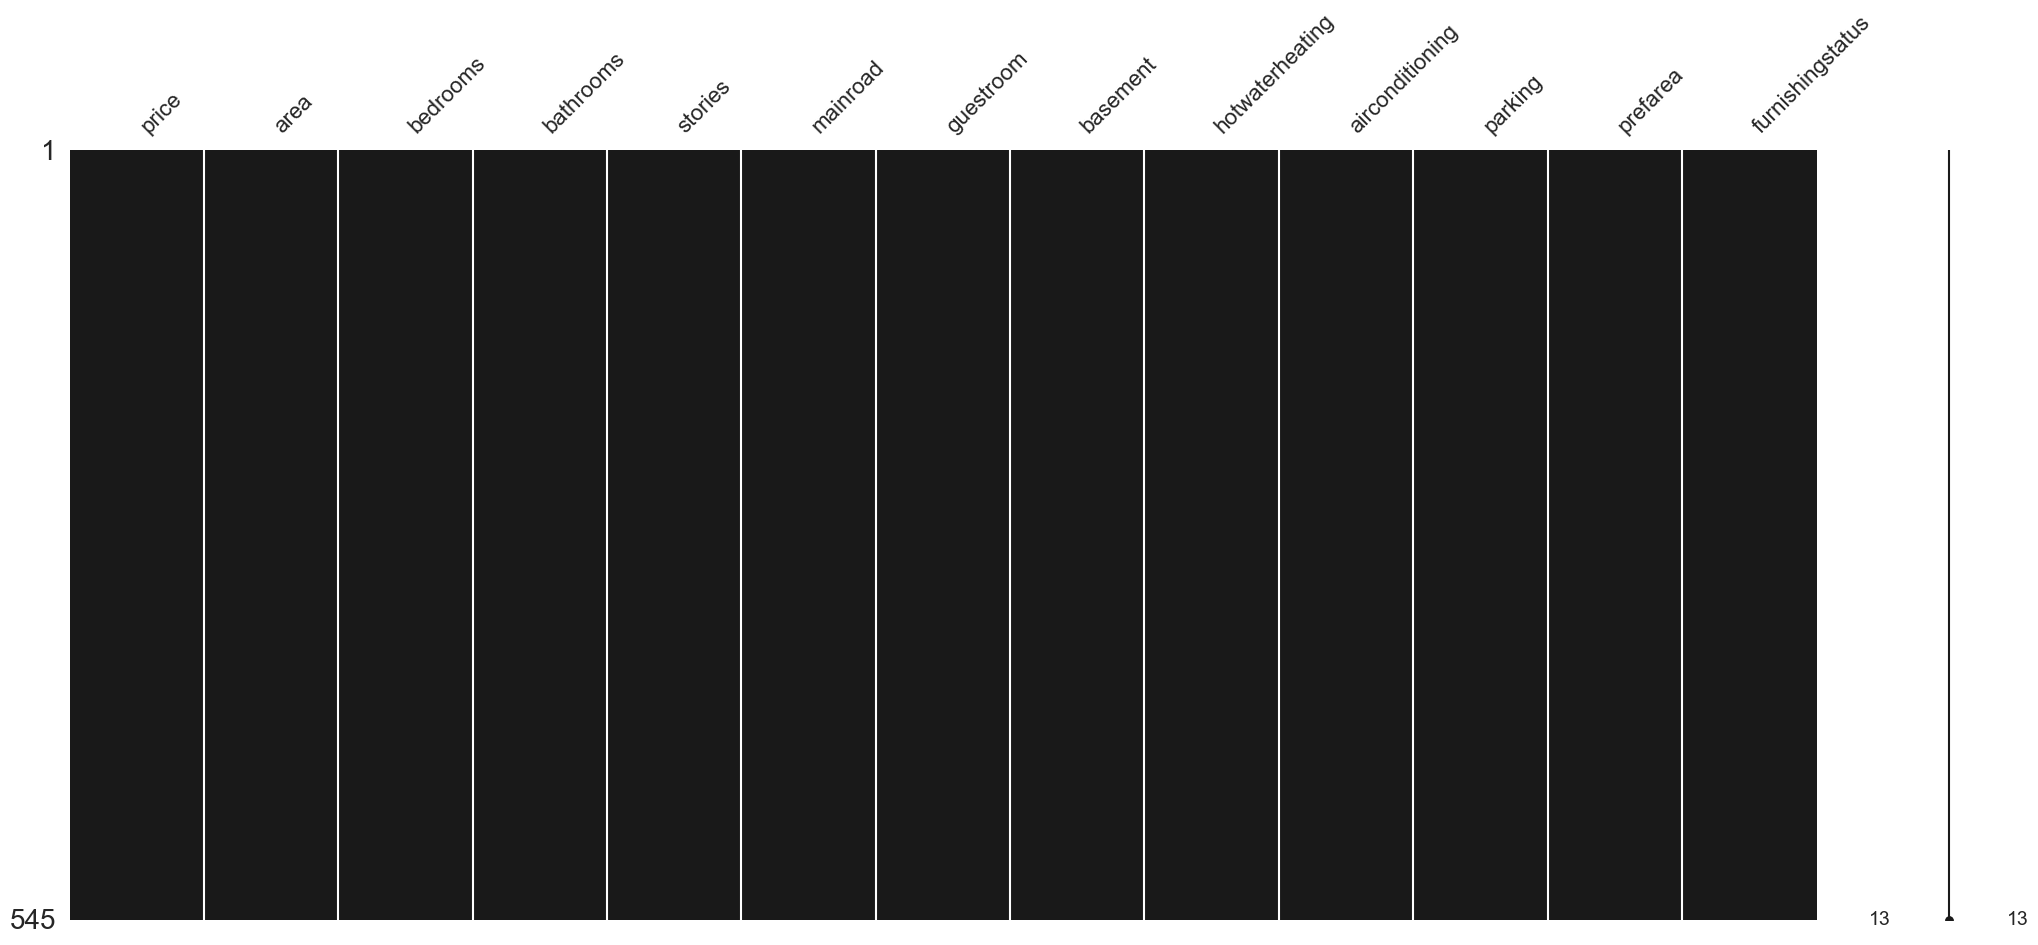

In [4]:
#df.isnull().sum().any()
msno.matrix(df, color=" 0.1")
plt.show()

<a id="3"> </a>
#### 1.2. Explanation of features

The dataset *df* contains the following variables:<br>

* `area`: area of the house (numeric continuos);<br>
* `bedrooms`: number of bedrooms ( numeric discrete - it's a count from 1 to 6);<br>
* `bathrooms`: number of bathrooms ( numeric discrete - it's a count from 1 to 4);<br>
* `stories`: ( numeric discrete - it's a count from 1 to 4 already encoded);<br>
* `mainroad`:( binary  feature already encoded)( 0->no, 1->yes);<br>
* `guestroom`:  binary  feature already encoded)( 0->no, 1->yes);<br>
* `basement`: ( binary  feature already encoded)( 0->no, 1->yes);<br>
* `hotwaterheating`: ( binary feature already encoded)( 0->no, 1->yes);<br>
* `airconditioning`: ( binary  feature already encoded)( 0->no, 1->yes);<br>
* `parking`: Number of parking ( numeric discrete - it's a count from 0 to 3);<br>
* `prefarea`: ( binary feature already encoded)( 0->no, 1->yes);<br>
* `furnishingstatus`:( ordinal (qualitative) feature already encoded)( 0->unfurnished , 1->semi-furnished, 2->furnished );<br>
* `price`: which represents the target variable of our problem, namely the variable to predict ( numeric continuos)

We see that the variables are all numerical (continuous or discrete) or binary/qualitative but already encoded.


<a id="4"> </a>
#### 1.3. Cataloguing of features

In [5]:
#create lists for each type of feature to study their correlations and later,
#when it is time to train a learning model, encode them in numerical values.


#ordinal categorical features:
ord=["furnishingstatus",]

#binary features:
binary = []
for i in df.columns:
    if len(df[i].unique()) == 2:
        binary.append(i)

#numerical features:
num = []
for i in df.columns:
    if i not in binary and i not in ord:
        num.append(i)


print("Numerical features:\n{} \nTot: {}".format(num,len(num)))
print("Ordinal categorical features:\n{}\nTot: {}".format(ord,len(ord)))
print("Binary features:\n{}\nTot: {}".format(binary,len(binary)))

Numerical features:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'] 
Tot: 6
Ordinal categorical features:
['furnishingstatus']
Tot: 1
Binary features:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
Tot: 6


<a id="5"> </a>
### 2. Exploratory Data Analysis (EDA)

In [6]:
# =============================================================================
# 3. Exploratory data analysis (EDA)
# =============================================================================

print("\nSTEP 2: Exploratory Data Analysis")
print("-" * 40)

# Checking for missing values
print("Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicates}")


STEP 2: Exploratory Data Analysis
----------------------------------------
Checking for missing values:
Series([], dtype: int64)
No missing values found!

Number of duplicated rows: 0


<a id="6"> </a>
#### 2.1.Analysis of target distribution (Price)

Let's try to better understand the price distribution and check whether the data follows a normal distribution or presents anomalies.

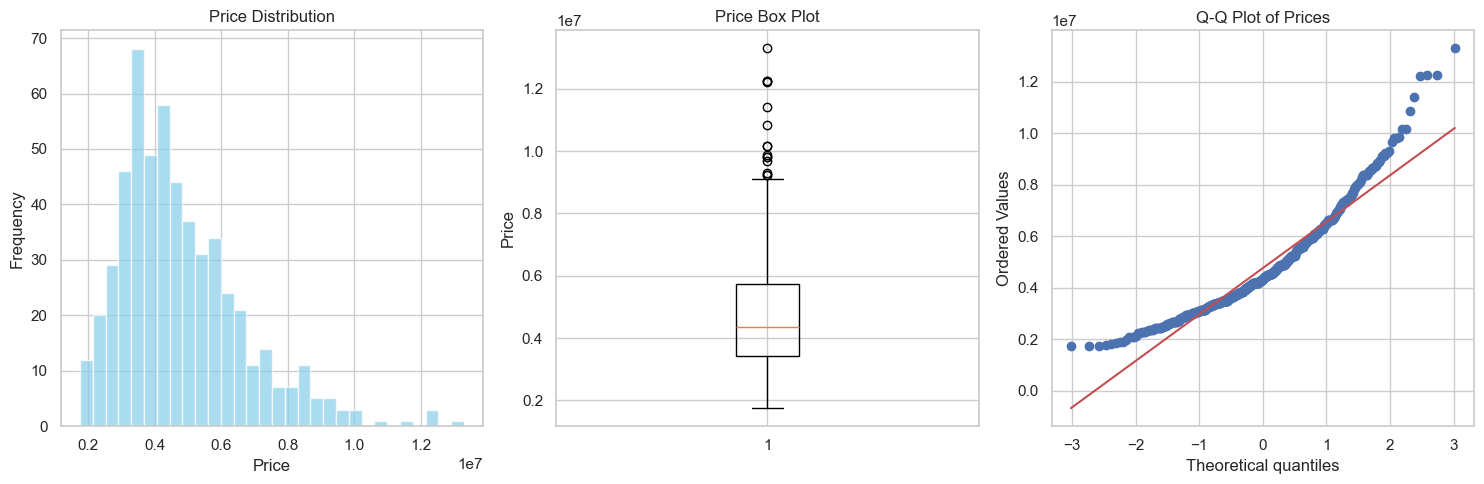


Target statistics (Price):
Mean: $4,766,729.25
Median: $4,340,000.00
Standard Deviation: $1,870,439.62
Min: $1,750,000.00
Max: $13,300,000.00


In [7]:
# Target distribution analysis (Price)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=30, alpha=0.7, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df['price'])
plt.title('Price Box Plot')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Prices')

plt.tight_layout()
plt.show()

# Target statistics
print(f"\nTarget statistics (Price):")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Standard Deviation: ${df['price'].std():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")

Histogram (left)<br>

Shows the distribution of prices.<br>
The X-axis = price, the Y-axis = frequency (how many times that price appears).<br>
We see that prices are mainly concentrated between 2M and 6M (peaking around 4M).<br>
The distribution is skewed to the right (positively skewed) → there are some very high prices that “pull” the tail to the right.<br>
Info: most prices are medium-low, but there are rare and very high cases.<br>

Box Plot (center)<br>

Summarizes the distribution in terms of median, quartiles, and outliers.<br>
The red line = median (central value).<br>
The rectangle = interquartile range (Q1–Q3).<br>
The circles above the “whiskers” = outliers (anomalous prices that are much higher).<br>
Info: the data has several upper outliers (prices much higher than the average). This confirms that the distribution is skewed to the right.<br>

Q-Q Plot (right)<br>

This is used to compare prices with a theoretical normal distribution.<br>
If the points followed the red diagonal → the data would be normal.<br>
Here, the points deviate significantly: in the lower tail and especially in the upper tail, the actual prices are very different from the theoretical values.<br>
Info: the distribution is not normal, but has a long tail on the right (typical of economic variables such as prices).<br>

In summary:<br>

Prices do not follow a normal distribution.<br>
They are positively skewed (right-skewed).<br>
There are many outliers (prices that are very high compared to the rest).<br>
Most observations are concentrated in the lower-middle range.

<a id="7"> </a>
#### 2.2. Study of distribution and correlations between features

Let's start with the numerical features

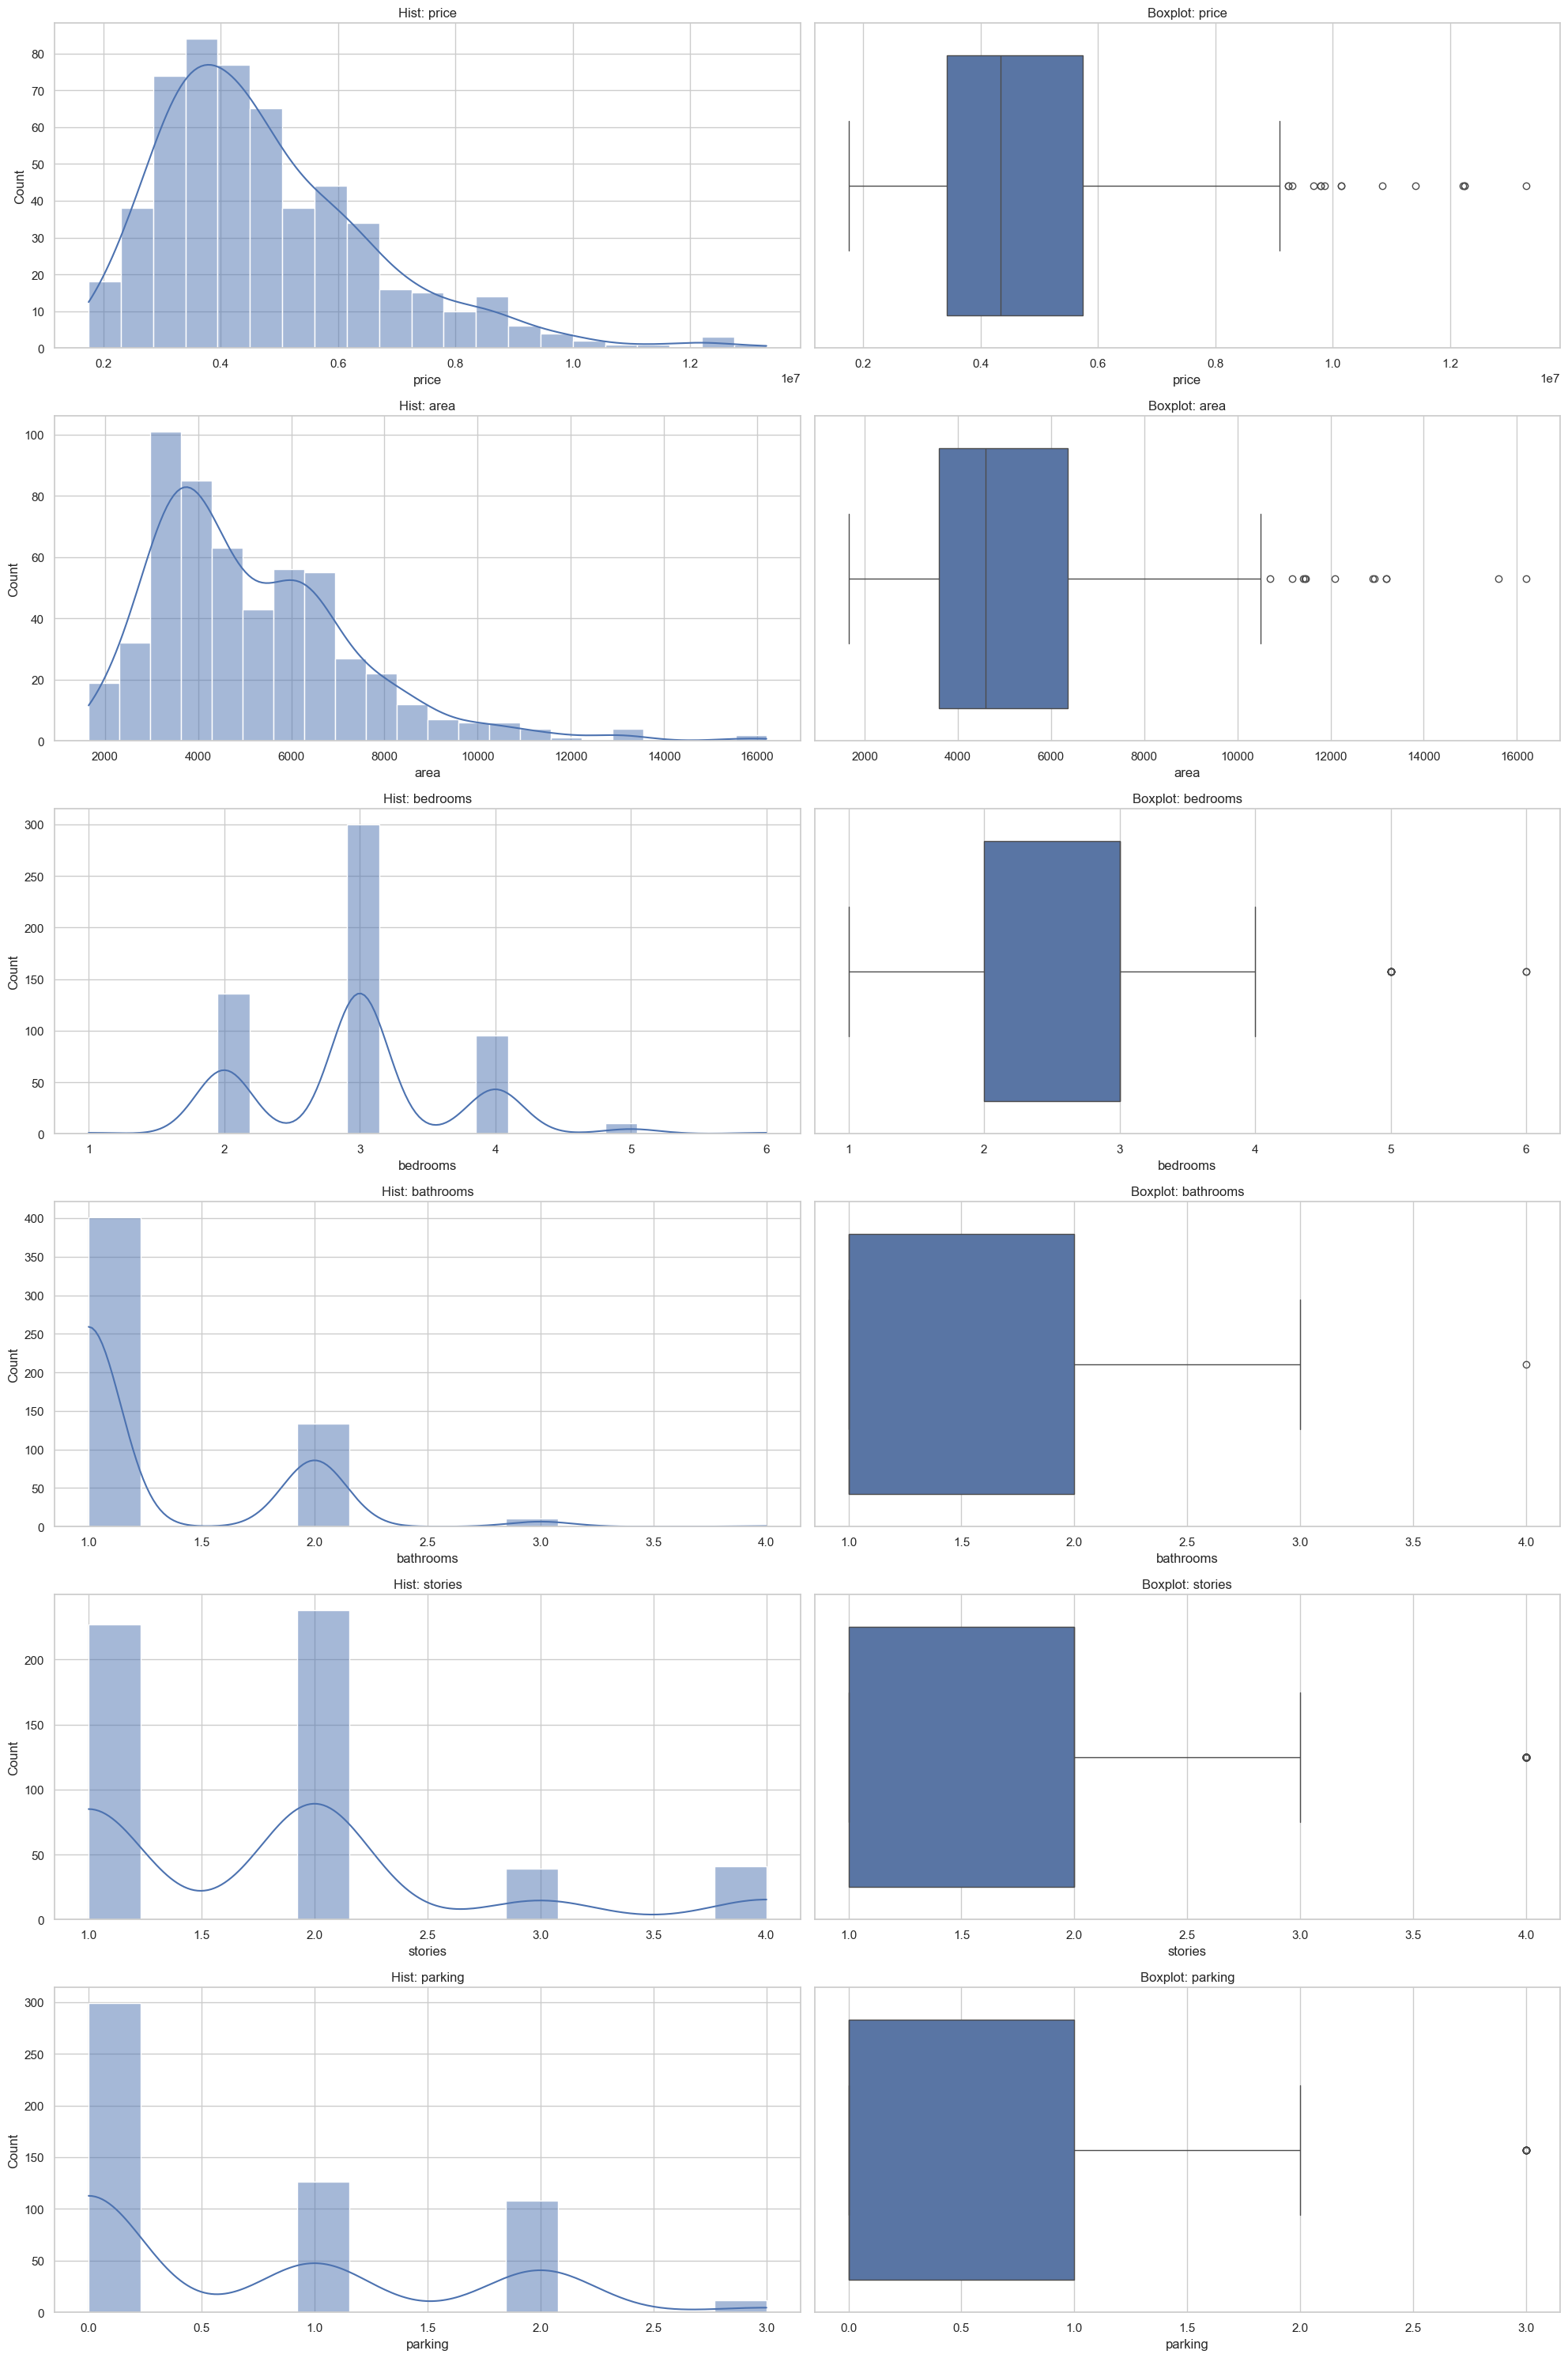

In [8]:
num_features = len(num)
plt.figure(figsize=(20, 5 * num_features))

for i, feature in enumerate(num):
    # Histogram
    plt.subplot(num_features, 2, 2*i + 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Hist: {feature}')

    # Boxplot
    plt.subplot(num_features, 2, 2*i + 2)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot: {feature}')

plt.tight_layout()
plt.show()

These graphs show you how the main variables in the real estate dataset are distributed. Each row represents a variable, with a histogram (left) and boxplot (right). Let's look at them one by one:<br>

Price<br>

Histogram: skewed distribution to the right (many low-to-medium prices, few very high prices).<br>
Boxplot: many outliers above the threshold (very expensive houses).<br>
Prices are not normal, they have a long tail towards the top. This can influence regression models → a logarithmic transformation is often applied.<br>

Area (surface area)<br>

Histogram: multimodal distribution (multiple peaks → groups of houses with typical sizes).<br>
Boxplot: several outliers for very large areas.<br>
There are standard types of houses (e.g., around 4000–6000 square meters) and a few very large ones that distort the distribution.<br>

Bedrooms<br>

Histogram: discrete distribution (values are integers). The main peaks are on 2, 3, and 4 bedrooms.<br>
Boxplot: most houses have 2–3 bedrooms, but there are outliers with 5–6 bedrooms.<br>
Almost discrete categorical variable: standard houses have 2–3 rooms.<br>

Bathrooms<br>

Histogram: concentrated on 1 bathroom and another group on 2 bathrooms. Few houses with 3–4 bathrooms.<br>
Boxplot: narrow distribution, with few outliers on the right.<br>
Variable with little dispersion, most houses have 1–2 bathrooms.<br>

Stories<br>

Histogram: clear peaks on 1 and 2 floors. Some cases with 3 or 4.<br>
Boxplot: concentrated values, with some outliers.<br>
Mostly low-rise buildings (1–2 floors).<br>

Parking (parking spaces)<br>

Histogram: most have 0 or 1 parking space, few with 2–3.<br>
Boxplot: few outliers with more parking spaces.<br>
This variable is also discrete and concentrated on smaller values.<br>

In summary:<br>

Price and area: continuous, asymmetric variables with outliers → we can evaluate for transformations (e.g., log).<br>

Bedrooms, bathrooms, stories, parking: discrete variables with distribution heavily concentrated on a few values.

All variables show outliers that can influence machine learning models.

<br>
Now let's take a look at the correlation between the numerical features


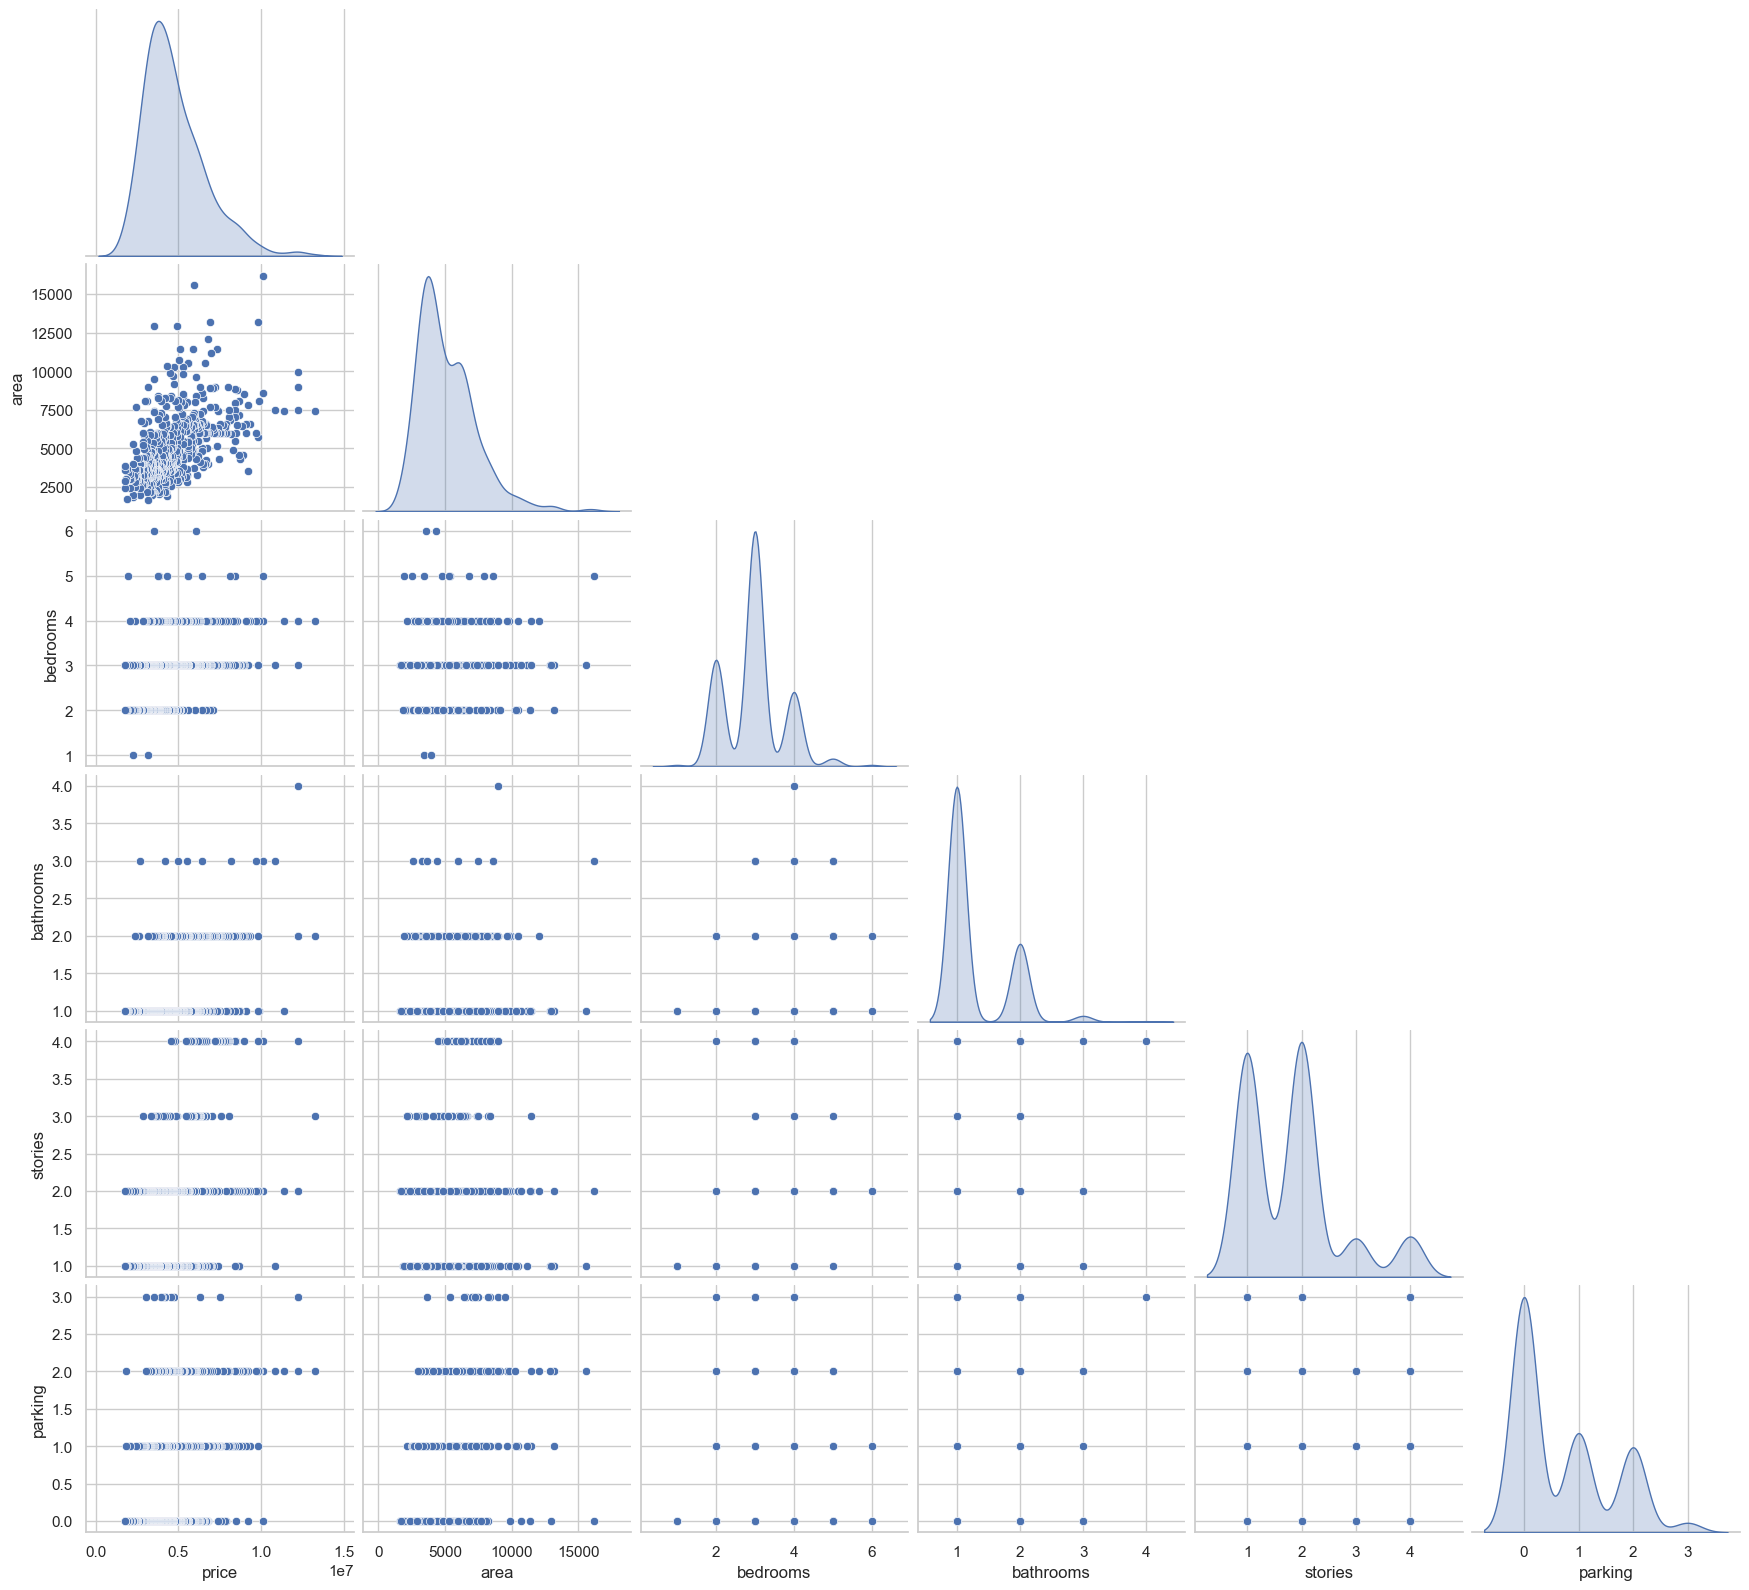

In [9]:
#first I draw a pairplot that will create a series of scatterplots, one for each combination of features
sns.pairplot(df[num], height=2.7, aspect=1.1, corner=True, diag_kind="kde")
plt.show()

Here pairplot (or scatterplot matrix) shows the distributions of individual variables and the relationships between pairs of variables simultaneously.<br>

How to read the graph:<br>

Diagonal (univariate graphs)<br>

Here you have the histograms/density plots of the individual variables (price, area, bedrooms, bathrooms, stories, parking).<br>
They confirm what we have already seen: price and area are skewed to the right, while bedrooms, bathrooms, stories, and parking are discrete and concentrated around a few values.<br>

Outside the diagonal (scatterplot between two variables)<br>

Each point represents an observation (a house).<br>
You can see if there is a correlation or pattern between two variables.<br>

Interpretation of the main relationships:<br>

Price vs. Area:<br>

There is a positive correlation → larger houses tend to cost more.<br>
However, it is not a perfectly linear relationship: there are houses with similar areas but very different prices (probably due to quality factors, location, etc.).<br>

Price vs. Bedrooms/Bathrooms/Stories/Parking:<br>

The relationship is much weaker and “stepped” because these variables are discrete.<br>
For example: more bedrooms often correspond to higher prices, but with a lot of variability.<br>
The same applies to bathrooms, stories, and parking → they are not enough on their own to explain the price.<br>

Area vs. Bedrooms/Bathrooms:<br>

Clearer relationship: the more bedrooms/bathrooms, the larger the surface area of the house tends to be.<br>
This makes sense because physical area and number of rooms are related.<br>

Relationships between discrete variables (bedrooms, bathrooms, stories, parking):<br>

They show well-defined clusters (overlapping points on a few categories).<br>
There is no continuous correlation, but rather “classes” (e.g., houses with 3 bedrooms and 2 bathrooms that repeat).<br>


<br>
I now create a heatmap containing the exact values of the correlations. The scores are calculated using *the Pearson correlation index*, which determines the covariance between variables. <br>
Scores closer to 1 will indicate a strong positive correlation, i.e. as the value of one feature increases, so will the value of the other feature. Conversely, scores close to -1 will indicate a negative correlation (as the value of one feature increases, the value of the other feature decreases). <br>
Scores close to 0 indicate no correlation.

In [10]:
#create a table with the correlation values
#the 'corr()' method uses Pearson's coefficient by default to study the covariance between features
fig = px.imshow(round(df[num].corr(),2), text_auto=True, title="Correlations between numerical features - Pearson",
                labels=dict(color="Correlation"), color_continuous_scale=px.colors.sequential.RdBu_r,
                color_continuous_midpoint=0,aspect="auto")
fig.show()

Strongest correlations:<br>

Price-Area (0.54): The larger the house, the more it costs—logical.<br>
Price-Bathrooms (0.52): More bathrooms = higher price.<br>
Price-Stories (0.42): Multi-story houses cost more.<br>
Bedrooms-Stories (0.41): Houses with more bedrooms tend to have more stories.<br>

Weak correlations:<br>

Area-Stories (0.08): Area is not strongly correlated with the number of stories<br>
Stories-Parking (0.05): The number of stories does not influence the number of parking spaces

In [11]:
fig = px.imshow(round(df[num].corr(method='spearman'),2), text_auto=True, title="Correlations between numerical features - Spearman",
                labels=dict(color="Correlation"), color_continuous_scale=px.colors.sequential.RdBu_r,
                color_continuous_midpoint=0,aspect="auto")
fig.show()

This is a Spearman correlation graph, which differs from the Pearson graph showed earlier. Here are the differences and how to interpret it:<br>
- Pearson (previous): measures linear correlations - only detects straight-line relationships<br>
- Spearman (this one): measures monotonic correlations - also detects curved relationships as long as they increase/decrease consistently<br>

Looking at the changes compared to Pearson:<br>
Correlations increased with Spearman:<br>

Price-Area: from 0.54 → 0.60 (+0.06)<br>
Bedrooms-Stories: from 0.41 → 0.50 (+0.09)<br>
Price-Bedrooms: from 0.37 → 0.39 (+0.02)<br>

Decreased correlations:<br>

Price-Bathrooms: from 0.52 → 0.48 (-0.04)<br>
Price-Stories: from 0.42 → 0.36 (-0.06)<br>

What this means<br>
When Spearman > Pearson: The relationship is not perfectly linear but follows a monotonic trend (e.g., growth slowing down or accelerating).<br>
When Spearman < Pearson: The relationship is fairly linear, but there are some outliers or variations.<br>

Price-Area (0.60): The relationship is even stronger considering non-linear trends - the price probably increases disproportionately to the area.
Bedrooms-Stories (0.50): There is a strong monotonic relationship - as the number of bedrooms increases, the number of floors also tends to increase.
Correlations with price remain in the order: Area > Bathrooms > Bedrooms > Stories/Parking<br>

Dataset has some relationships that are not perfectly linear, especially between price-area and rooms-floors, which Spearman captures better than Pearson.


I move on to the analysis of the Binary features.<br>
I study the variance of the `price` according to each value of the other binary features


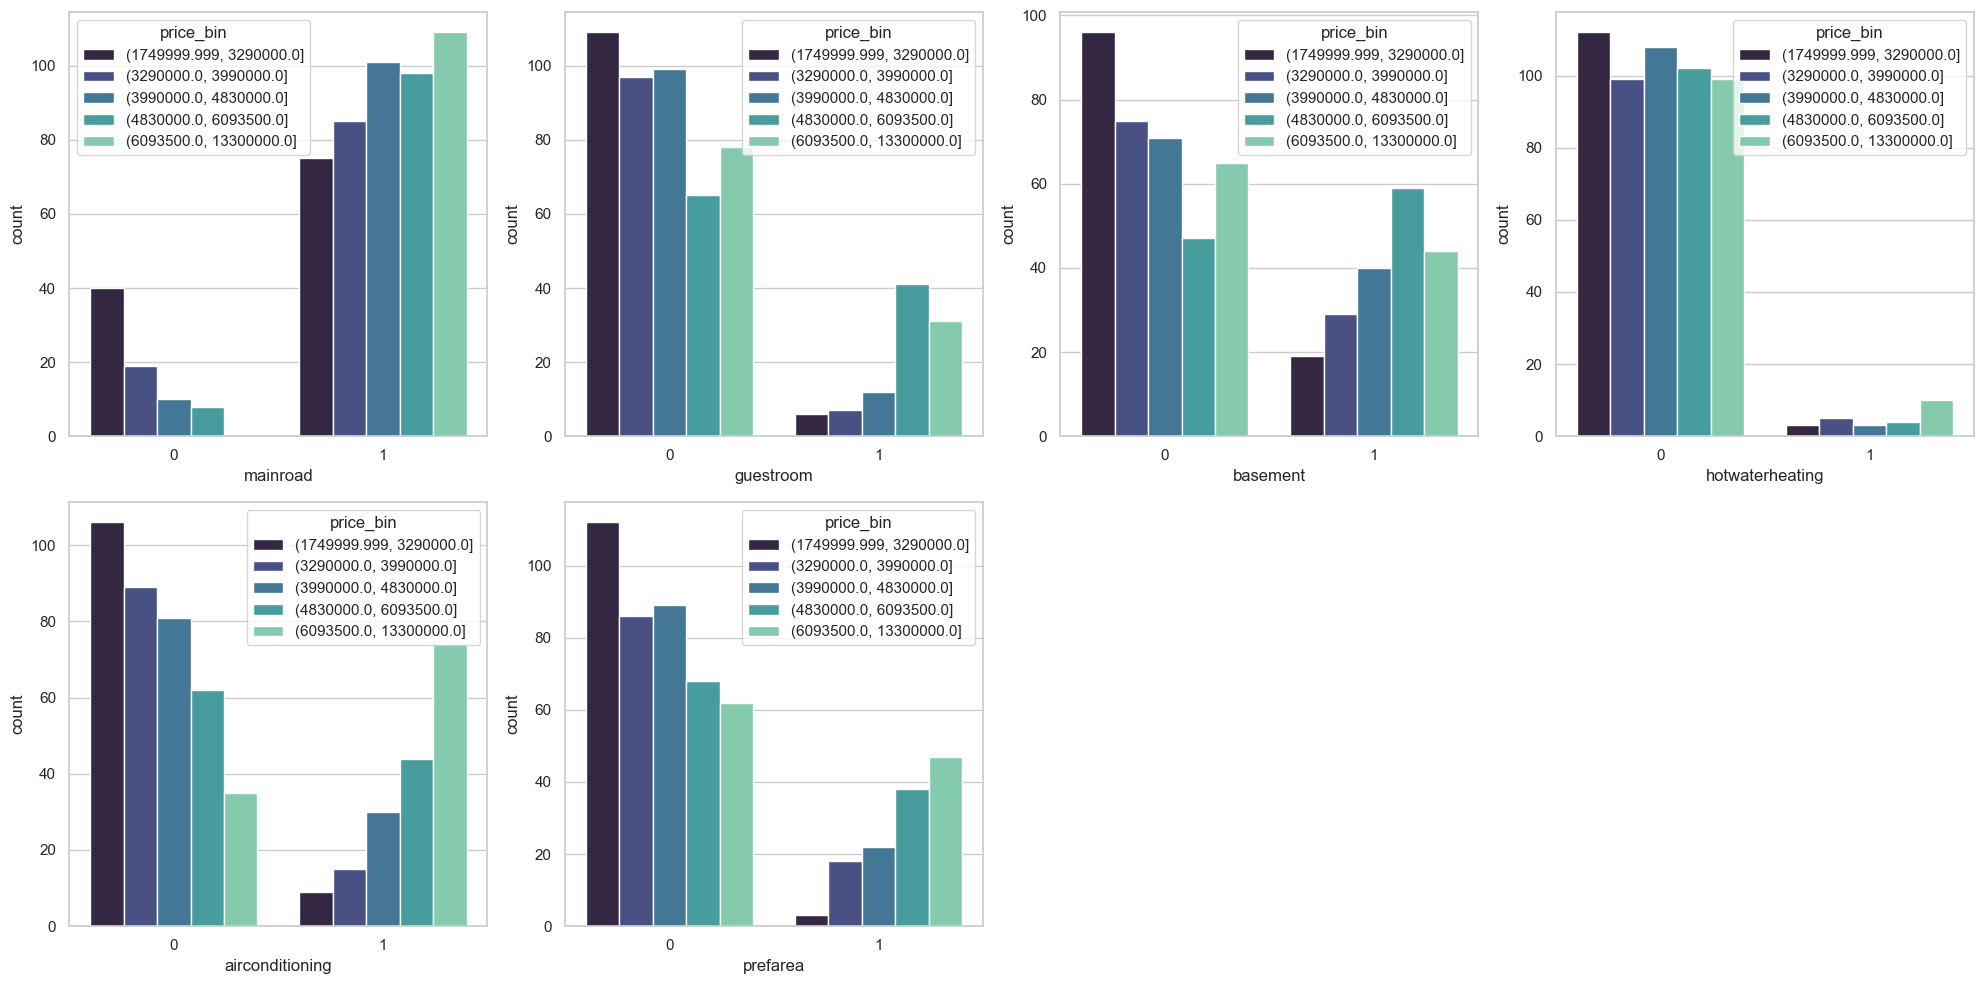

In [12]:
df_bin =df.copy()

df_bin["price_bin"] = pd.qcut(df_bin["price"], q=5)  # 5 quantiles

i=1
plt.figure(figsize=(20,10))
for col in binary: # Iterate through the original binary list
    plt.subplot(2,4,i)
    sns.countplot(data=df_bin, x=col, palette="mako", hue="price_bin")
    plt.tight_layout()
    i+=1

Mainroad<br>

Without main road: Mainly inexpensive homes (black dominant)<br>
With main road: More balanced distribution across all price ranges<br>
Conclusion: Being on a main road significantly increases value<br>

Guestroom<br>

Without: Many inexpensive and mid-priced homes<br>
With: Clear prevalence of expensive homes (light green dominant)<br>
Conclusion: Guest room = strong indicator of luxury<br>

Basement<br>

Without: Mainly inexpensive homes<br>
With: Balanced mix, but more expensive homes<br>
Conclusion: Basement adds value but less than guest room<br>

Hot water heating<br>

Almost all homes do NOT have this type of heating<br>
Those that do are predominantly expensive<br>
Conclusion: Rare and valuable feature<br>

Air conditioning<br>

Without: Strongly skewed toward inexpensive homes<br>
With: More balanced distribution<br>
Conclusion: AC is correlated with higher prices<br>

Preferred area<br>

Non-preferential: Mainly inexpensive/average<br>
Preferential: Clear prevalence of expensive homes<br>
Conclusion: Preferential location is a determining factor for price<br>

Ranking by impact on price<br>

Preferred area - maximum impact<br>
Guest room - very high impact<br>
Main road - high impact<br>
Air conditioning - medium impact<br>
Basement - medium impact<br>
Hot water heating - rare but valuable<br>

Let us now also look at the only qualitative ordinal variable

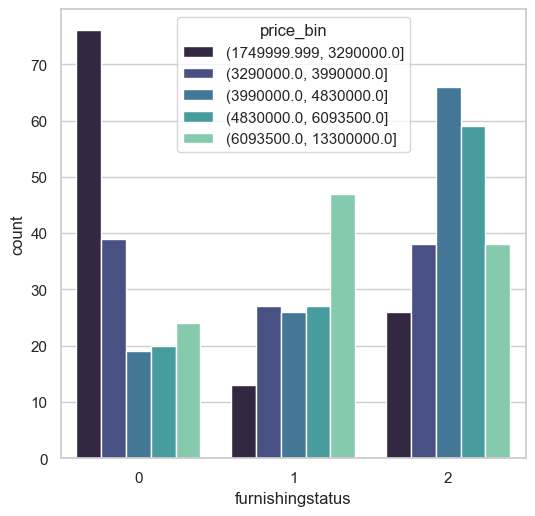

In [13]:
i=1
plt.figure(figsize=(20,10))
for col in ord: # Iterate through the original ord list
    plt.subplot(2,4,i)
    sns.countplot(data=df_bin, x=col, palette="mako", hue="price_bin")
    plt.tight_layout()
    i+=1

Unfurnished (0)<br>

Absolute dominance of affordable homes (black - lowest price range)<br>
Very few homes in the higher price ranges<br>
Conclusion: Most affordable homes are sold unfurnished<br>

Partially furnished (1)<br>

More balanced distribution across all price ranges<br>
Peak in the most expensive homes (light green)<br>
Fewer homes in the cheapest range<br>
Conclusion: Partial furnishing is often associated with medium-high value homes<br>

Fully furnished (2)<br>

Strong concentration in the medium-high ranges (dark blue and teal)<br>
Very few homes in the cheapest range<br>
Almost uniform distribution in the mid-to-high ranges<br>
Conclusion: Full furnishing adds significant value<br>

Main pattern: there is a clear positive correlation between level of furnishing and price:<br>

Cheap homes → Mostly unfurnished<br>
Mid-range homes → Mix of all levels of furnishing<br>
Expensive homes → More often partially or fully furnished<br>

Market insight<br>

Sellers of expensive homes invest in furnishings to maximize value<br>
Affordable homes are sold “bare” to reduce costs<br>
Partial furnishing may be the optimal strategy for mid-range homes<br>

This suggests that furnishings are both a cause and an effect of high property prices.

Let's now try to investigate multicollinearity.

In [14]:

def check_multicollinearity(df, corr_threshold=0.8, vif_threshold=5):
  """
    Check for multicollinearity in a dataset using correlation matrix and VIF analysis.

    This function analyzes multicollinearity between numerical features by:
    1. Computing Spearman correlation matrix and visualizing it as a heatmap
    2. Identifying highly correlated feature pairs above the threshold
    3. Calculating Variance Inflation Factor (VIF) for each feature
    4. Reporting features with problematic VIF values

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe containing the features to analyze
    corr_threshold : float, default=0.8
        Absolute correlation threshold above which features are considered
        highly correlated (range: 0.0 to 1.0)
    vif_threshold : float, default=5
        VIF threshold above which features are considered problematic.
        Common thresholds: 5 (moderate), 10 (high multicollinearity)

    Returns
    -------
    None
        The function prints results and displays visualizations but doesn't
        return any values

    Notes
    -----
    - Only numerical features (int64, float64) are analyzed
    - Missing values are automatically dropped before analysis
    - Uses Spearman correlation to capture non-linear relationships
    - VIF > 5 suggests moderate multicollinearity
    - VIF > 10 indicates severe multicollinearity
    - The constant term is automatically added for VIF calculation but
      excluded from problematic features reporting

    Examples
    --------
    >>> # Basic usage with default thresholds
    >>> check_multicollinearity(df)

    >>> # Custom thresholds for stricter analysis
    >>> check_multicollinearity(df, corr_threshold=0.7, vif_threshold=3)

    >>> # More lenient thresholds
    >>> check_multicollinearity(df, corr_threshold=0.9, vif_threshold=10)
  """

  # Numeric variable selection
  num_df = df.select_dtypes(include=['float64', 'int64']).dropna()

  # Heatmap correlations
  corr_matrix = num_df.corr(method='spearman')
  plt.figure(figsize=(10,8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
  plt.title("Correlation Matrix")
  plt.show()

  # Highly correlated features
  high_corr = set()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if abs(corr_matrix.iloc[i,j]) > corr_threshold:
              colname = corr_matrix.columns[i]
              high_corr.add(colname)
  print(f"Correlated features > {corr_threshold}: {high_corr}")

  # VIF calculation
  X_const = add_constant(num_df)
  vif = pd.DataFrame()
  vif["Feature"] = X_const.columns
  vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                for i in range(X_const.shape[1])]
  print("\nVariance Inflation Factor (VIF):")
  print(vif)

  problematic = vif[vif["VIF"] > vif_threshold]["Feature"].tolist()
  problematic = [v for v in problematic if v != "const"]
  if problematic:
      print(f"\nFeatures with VIF > {vif_threshold}: {problematic}")
  else:
      print("\nNo features with high VIF found.")




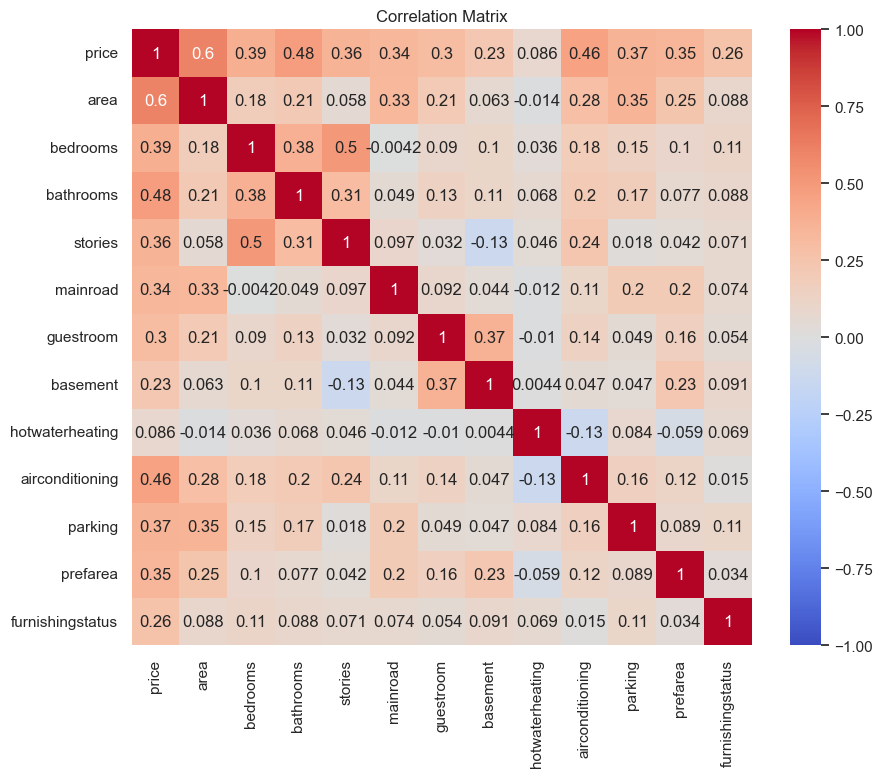

Correlated features > 0.8: set()

Variance Inflation Factor (VIF):
             Feature        VIF
0              const  27.146083
1              price   3.116613
2               area   1.577322
3           bedrooms   1.375860
4          bathrooms   1.507857
5            stories   1.615459
6           mainroad   1.187498
7          guestroom   1.223338
8           basement   1.347476
9    hotwaterheating   1.070241
10   airconditioning   1.352672
11           parking   1.261017
12          prefarea   1.217668
13  furnishingstatus   1.055852

No features with high VIF found.


In [15]:
check_multicollinearity(df)

Strongest correlations with PRICE<br>
Positive (red):<br>

Area (0.60) - Larger = more expensive<br>
Bathrooms (0.48) - More bathrooms = more expensive<br>
Bedrooms (0.39) - More bedrooms = more expensive<br>
Air conditioning (0.46) - AC increases value<br>
Parking (0.37) - Parking adds value<br>
Stories (0.36) - More floors = more expensive<br>
Prefarea (0.35) - Preferred area = more expensive<br>

Negative (blue):<br>

There are no significant negative correlations with price.<br>

Interesting correlations between features<br>
Moderate correlations:<br>

Bedrooms-Stories (0.50) - Houses with more bedrooms have more stories<br>
Guestroom-Basement (0.37) - Those with guest rooms often also have basements<br>
Area-Parking (0.35) - Larger houses have more parking spaces<br>

Weak/absent correlations:<br>

Hotwaterheating has very low correlations with everything (rare feature)<br>
Furnishingstatus is not strongly correlated with other physical features<br>

Key insights for the real estate market<br>

The most important factors for price are, in order:<br>

Size (area)<br>
Number of bathrooms<br>
Air conditioning<br>
Number of bedrooms<br>


Luxury features (guestroom, basement) are moderately correlated with each other<br>
There is no severe multicollinearity - no correlation >0.60 between predictors<br>
Furnishingstatus is relatively independent of other physical characteristics<br>

We can conclude that:

All variables can be retained in the model (no severe multicollinearity)<br>
Area, bathrooms, and air conditioning are the most promising predictors<br>
Binary variables add unique information not captured by numerical variables

Let's now try to analyze the outliers.

In [16]:

def detect_outliers(
    df: pd.DataFrame,
    method: str = "IQR",
    threshold: float = 1.5,
    z_threshold: float = 3.0,
    num: list | None = None,           # predefined list of numeric columns
    coerce_numeric: bool = False,      # if True, try to convert the columns in ‘num’ to numeric
    plot: bool = True,                 # if False, skip the graphs
    ncols: int = 3,                    # number of columns in subplots
    figsize_per_col: tuple = (4.5, 3.2) # # width, height for subplot
):
    """
    Detects outliers in a DataFrame using IQR or Z-score, displays boxplots in subplots,
    and returns:
      - outliers_df: outlier rows (long format)
      - summary_df: summary per column with outlier rate

    Parameters:
    - df: Pandas DataFrame
    - method: “IQR” or “Z-score”
    - threshold: IQR multiplier (default 1.5)
    - z_threshold: Z-score threshold (default 3.0)
    - num: list of columns to analyze (if None, use df.select_dtypes(np.number))
    - coerce_numeric: if True, converts columns to numeric (coerce) in ‘num’
    - plot: if True, draws boxplots in subplots
    - ncols: columns of the subplot grid
    - figsize_per_col: (w, h) per single subplot

    Returns:
    - outliers_df: pd.DataFrame
    - summary_df: pd.DataFrame
    """

    # Column selection
    if num is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        # keep only existing columns
        missing = [c for c in num if c not in df.columns]
        if missing:
            raise KeyError(f"Columns not found in the DataFrame: {missing}")
        cols = list(num)

        # optional: numerical strength
        if coerce_numeric:
            for c in cols:
                if not pd.api.types.is_numeric_dtype(df[c]):
                    df[c] = pd.to_numeric(df[c], errors='coerce')

        # if the user has passed non-numeric columns and does not want to enforce -> filter
        cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
        if not cols:
            raise ValueError("No numeric columns available after checks.")

    method_up = method.upper()
    if method_up not in {"IQR", "Z-SCORE"}:
        raise ValueError("Invalid method. Use ‘IQR’ or ‘Z-score’..")

    outlier_records = []
    summary_records = []

    # 2) Setup subplots
    if plot and len(cols) > 0:
        nrows = ceil(len(cols) / ncols)
        fig, axes = plt.subplots(
            nrows=nrows, ncols=ncols,
            figsize=(figsize_per_col[0]*ncols, figsize_per_col[1]*nrows),
            squeeze=False
        )
        axes_flat = axes.flatten()
    else:
        axes_flat = []

    # 3) Loop columns
    for i, col in enumerate(cols):
        s = df[col]

        # outlier mask calculation
        if method_up == "IQR":
            q1 = s.quantile(0.25)
            q3 = s.quantile(0.75)
            iqr = q3 - q1

            # if column constant or iqr=0 -> no outlier
            if pd.isna(iqr) or iqr == 0:
                mask = pd.Series(False, index=s.index)
                lower = upper = q1  # degenerate thresholds
            else:
                lower = q1 - threshold * iqr
                upper = q3 + threshold * iqr
                mask = (s < lower) | (s > upper)

        elif method_up == "Z-SCORE":
            # z-score maintains position with NaN
            z = pd.Series(stats.zscore(s, nan_policy='omit'), index=s.index)
            # if std=0 -> z all NaN
            mask = z.abs() > z_threshold
            lower = upper = None

        # Collect “long” outliers
        outliers_col = df[mask].copy()
        outliers_col["Feature"] = col
        if method_up == "IQR":
            outliers_col["Lower_Threshold"] = lower
            outliers_col["Upper_Threshold"] = upper
            outliers_col["Method"] = f"IQR (k={threshold})"
        else:
            outliers_col["Z_threshold"] = z_threshold
            outliers_col["Method"] = f"Z-score (|z|>{z_threshold})"
        outlier_records.append(outliers_col)

        # Summary & outlier rate
        n_valid = s.notna().sum()
        n_out = int(mask.sum())
        rate = (n_out / n_valid) if n_valid > 0 else np.nan

        record = {
            "Feature": col,
            "Method": "IQR" if method_up == "IQR" else "Z-score",
            "Parameters": f"k={threshold}" if method_up == "IQR" else f"|z|>{z_threshold}",
            "N_valid": int(n_valid),
            "N_outliers": n_out,
            "Outlier_rate": rate
        }
        if method_up == "IQR":
            record.update({"Q1": q1, "Q3": q3, "IQR": iqr, "Lower": lower, "Upper": upper})
        summary_records.append(record)

        # Boxplot on subplot
        if plot:
            ax = axes_flat[i]
            sns.boxplot(x=s, ax=ax, showfliers=True)
            ax.set_title(f"{col} • {method_up} • outliers: {n_out} ({rate:.1%})")
            ax.set_xlabel("")

    # turn off the empty axes
    if plot and len(axes_flat) > len(cols):
        for j in range(len(cols), len(axes_flat)):
            axes_flat[j].axis("off")
        plt.tight_layout()
        plt.show()

    # Final concatenations
    outliers_df = pd.concat(outlier_records, ignore_index=False) if outlier_records else pd.DataFrame()
    summary_df = pd.DataFrame(summary_records).sort_values("Outlier_rate", ascending=False, na_position="last")

    # sort summary columns
    base_cols = ["Feature", "Method", "Parameters", "N_valid", "N_outliers", "Outlier_rate"]
    iq_cols = ["Q1", "Q3", "IQR", "Lower", "Upper"]
    present_iq = [c for c in iq_cols if c in summary_df.columns]
    summary_df = summary_df[base_cols + present_iq]

    return outliers_df, summary_df


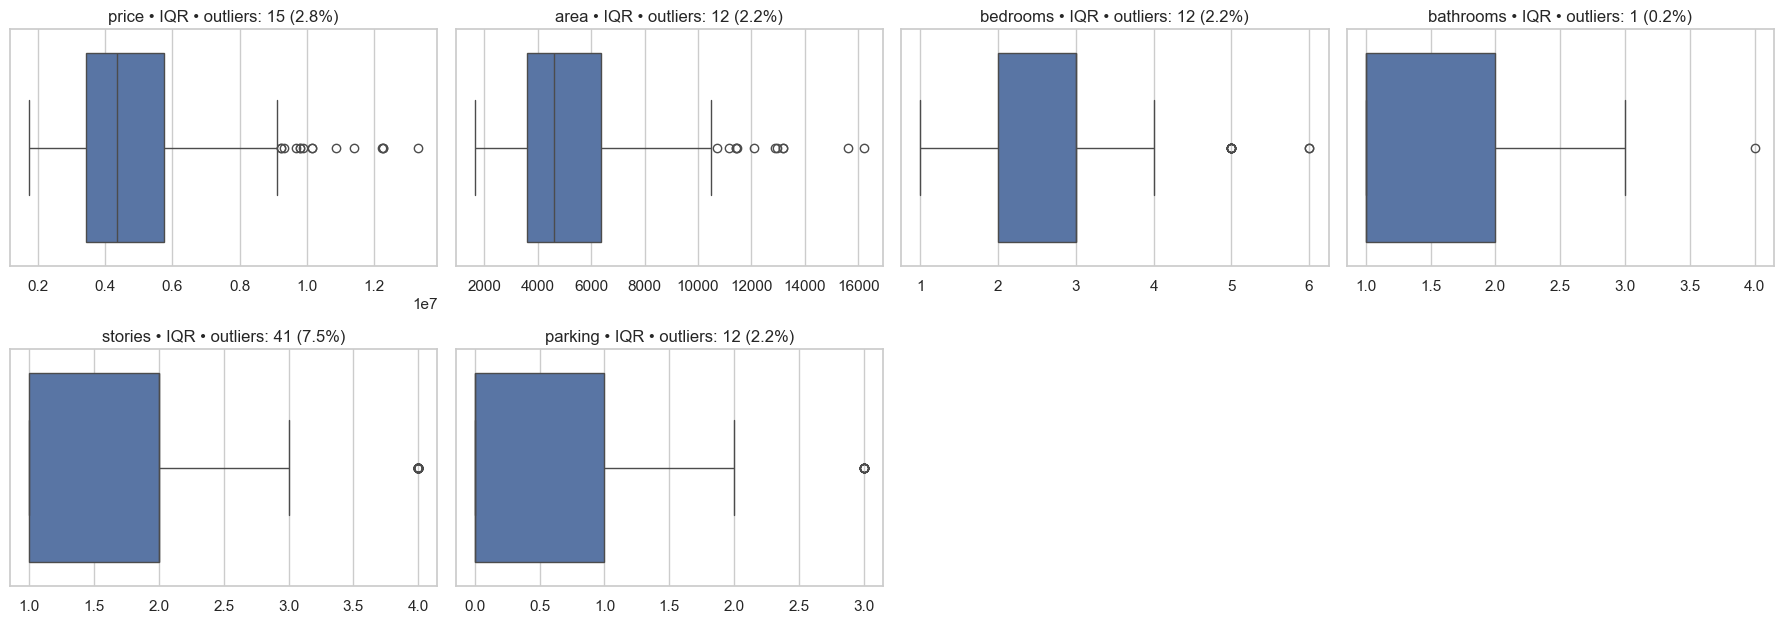

,Feature,Method,Parameters,N_valid,N_outliers,Outlier_rate,Q1,Q3,IQR,Lower,Upper
4,stories,IQR,k=1.5,545,41,0.075229,1.0,2.0,1.0,-0.5,3.5
0,price,IQR,k=1.5,545,15,0.027523,3430000.0,5740000.0,2310000.0,-35000.0,9205000.0
1,area,IQR,k=1.5,545,12,0.022018,3600.0,6360.0,2760.0,-540.0,10500.0
2,bedrooms,IQR,k=1.5,545,12,0.022018,2.0,3.0,1.0,0.5,4.5
5,parking,IQR,k=1.5,545,12,0.022018,0.0,1.0,1.0,-1.5,2.5
3,bathrooms,IQR,k=1.5,545,1,0.001835,1.0,2.0,1.0,-0.5,3.5


In [17]:
outliers_df, summary_df = detect_outliers(
    df,
    method="IQR",        # or "Z-score"
    threshold=1.5,
    num=num,             # <= use the default list
    coerce_numeric=True, # if there are numbers in strings
    plot=True,
    ncols=4
)


summary_df.head(13)

Analysis of outliers by variable<br>

Price - 15 outliers (2.8%)<br>
Many upward outliers (very expensive houses)<br>
Most data is concentrated in the lower range<br>
Asymmetric distribution to the right<br>

Area - 12 outliers (2.2%)<br>
Houses with exceptionally large floor areas<br>
Relatively normal distribution with some extreme values<br>

Bedrooms - 12 outliers (2.2%)<br>
Some houses with a very high number of bedrooms (probably 5-6+ bedrooms)<br>
Most have 2-4 bedrooms<br>

Bathrooms - 1 outlier (0.2%)<br>
Cleaner distribution with very few outliers<br>
Very well-behaved variable<br>

Stories - 41 outliers (7.5%)<br>
Highest percentage of outliers<br>
Many houses have an unusual number of stories<br>
Could be multi-story houses or incorrect values in the data<br>

Parking - 12 outliers (2.2%)<br>
Some properties with exceptional parking spaces<br>
Most have 0-2 parking spaces<br>

Problematic variables:<br>
Stories (7.5% outliers) - To be investigated for possible errors<br>
Price (2.8% outliers) - Legitimate luxury homes but to be considered in the analysis<br>

Clean variables:<br>
Bathrooms - Almost no outliers, reliable data<br>

So probably we have to:<br>
Investigate “stories” outliers - could be data entry errors<br>
Keep price outliers - likely legitimate luxury homes<br>
Consider log transformations for price and area if necessary for modeling<br>
Consider removing or capping extreme outliers with other method before machine learning

In [18]:
# Train/Test split PRIMA di qualsiasi rimozione outlier
X = df.drop(columns=['price']).copy()
y = df['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Outlier detection SOLO sul train
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

scaler_lof = StandardScaler()
X_train_num_scaled = scaler_lof.fit_transform(X_train[num_cols])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
lof_pred = lof.fit_predict(X_train_num_scaled)
is_inlier_lof = (lof_pred == 1)

iso = IsolationForest(contamination=0.005, random_state=42)
iso_pred = iso.fit_predict(X_train[num_cols])
is_inlier_iso = (iso_pred == 1)

is_inlier_both = is_inlier_lof & is_inlier_iso

X_train_clean = X_train.loc[is_inlier_both].reset_index(drop=True)
y_train_clean = y_train.loc[is_inlier_both].reset_index(drop=True)

print("Train clean:", X_train_clean.shape, " test unchanged:", X_test.shape)

Train clean: (431, 12)  test unchanged: (109, 12)


LOF and Isolation forest detect different outliers. Considering that the dataset is small, I prefer to use LOF and eliminate the 3 outliers found.

In [19]:
df_train_clean = pd.concat([X_train_clean, y_train_clean], axis=1)

df_test = pd.concat([X_test.reset_index(drop=True), 
                     y_test.reset_index(drop=True)], axis=1)

df_clean_full = pd.concat([df_train_clean, df_test], axis=0).reset_index(drop=True)

print("Original Dataset:", df.shape)
print("Reconstructed Dataset:", df_clean_full.shape)


Original Dataset: (545, 13)
Reconstructed Dataset: (540, 13)


It is difficult to understand whether these five outliers are really outliers, measurement errors in the dataset, or something else. Therefore, considering that the dataset is already very small, I decide not to eliminate them and keep the original.

Let us now try to use different specific statistical tests to further support what has been highlighted so far.

Shapiro-Wilk test: stat=0.9216, p-value=0.0000
The distribution of ‘price’ is NOT normal (use nonparametric tests).

Mann-Whitney U test for mainroad vs price: stat=7860.0000, p-value=0.0000
  => Significant difference in price for mainroad(the two groups have different distributions )



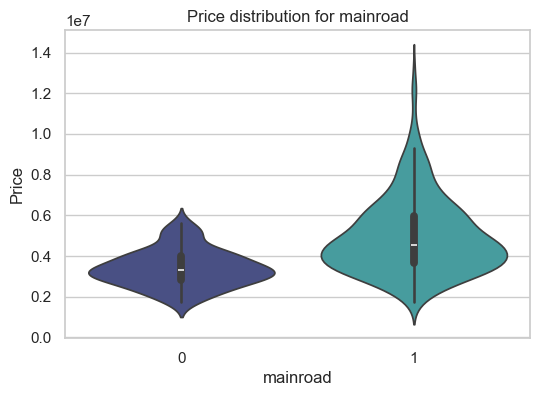

Mann-Whitney U test for guestroom vs price: stat=11890.0000, p-value=0.0000
  => Significant difference in price for guestroom(the two groups have different distributions )



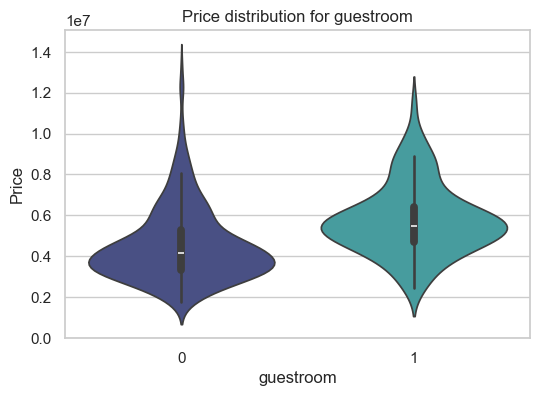

Mann-Whitney U test for basement vs price: stat=24395.0000, p-value=0.0000
  => Significant difference in price for basement(the two groups have different distributions )



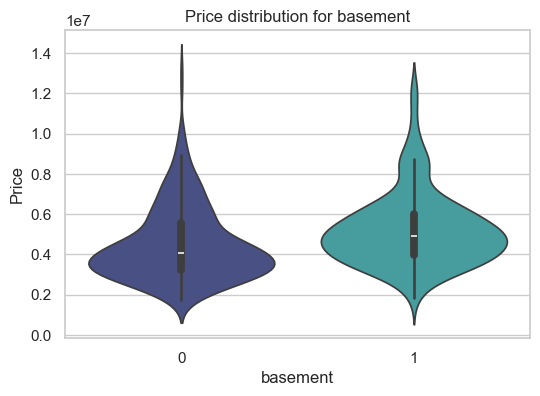

Mann-Whitney U test for hotwaterheating vs price: stat=4966.0000, p-value=0.0461
  => Significant difference in price for hotwaterheating(the two groups have different distributions )



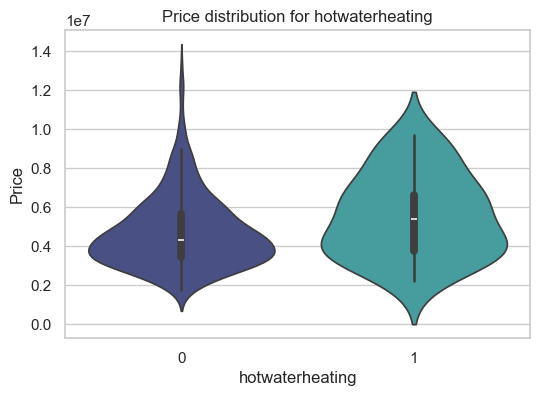

Mann-Whitney U test for airconditioning vs price: stat=13864.0000, p-value=0.0000
  => Significant difference in price for airconditioning(the two groups have different distributions )



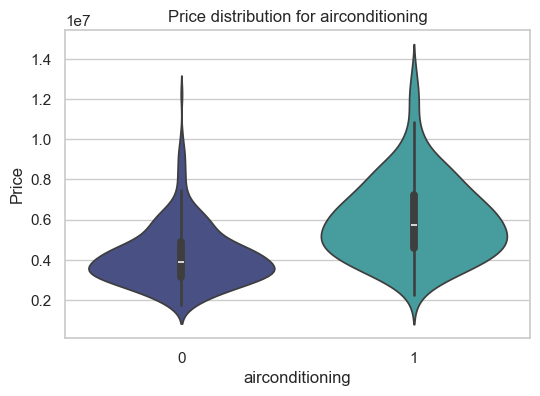

Mann-Whitney U test for prefarea vs price: stat=14050.0000, p-value=0.0000
  => Significant difference in price for prefarea(the two groups have different distributions )



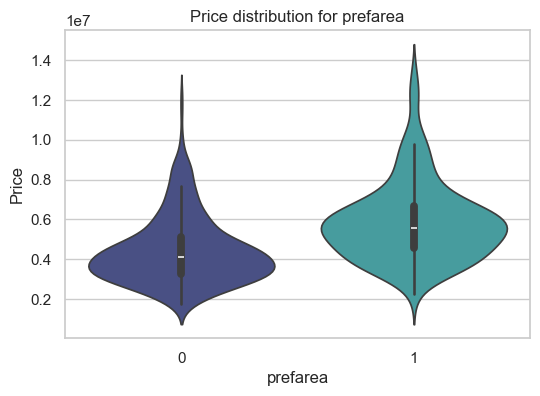

Kruskal-Wallis test for furnishingstatus vs price: stat=69.5829, p-value=0.0000
  => Significant difference in price between groups of  furnishingstatus (at least one group has a different distribution)



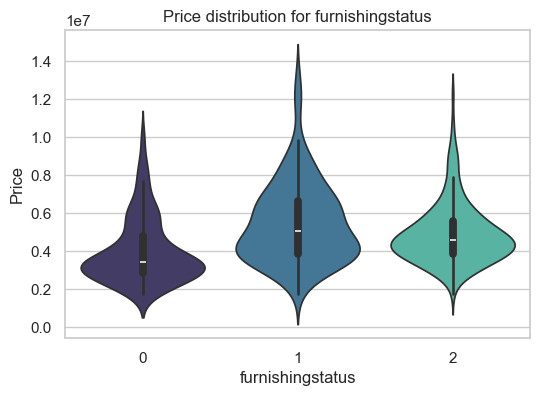

Pearson and Spearman correlations with price:
price: Pearson r=1.0000 (p=0.0000), Spearman ρ=1.0000 (p=0.0000)
area: Pearson r=0.5360 (p=0.0000), Spearman ρ=0.6029 (p=0.0000)
bedrooms: Pearson r=0.3665 (p=0.0000), Spearman ρ=0.3905 (p=0.0000)
bathrooms: Pearson r=0.5175 (p=0.0000), Spearman ρ=0.4799 (p=0.0000)
stories: Pearson r=0.4207 (p=0.0000), Spearman ρ=0.3629 (p=0.0000)
parking: Pearson r=0.3844 (p=0.0000), Spearman ρ=0.3654 (p=0.0000)
furnishingstatus: Pearson r=0.1901 (p=0.0000), Spearman ρ=0.2588 (p=0.0000)
mainroad: Pearson r=0.2969 (p=0.0000), Spearman ρ=0.3401 (p=0.0000)
guestroom: Pearson r=0.2555 (p=0.0000), Spearman ρ=0.3000 (p=0.0000)
basement: Pearson r=0.1871 (p=0.0000), Spearman ρ=0.2301 (p=0.0000)
hotwaterheating: Pearson r=0.0931 (p=0.0298), Spearman ρ=0.0855 (p=0.0460)
airconditioning: Pearson r=0.4530 (p=0.0000), Spearman ρ=0.4571 (p=0.0000)
prefarea: Pearson r=0.3298 (p=0.0000), Spearman ρ=0.3477 (p=0.0000)


In [20]:
# Verify normality of the target (Shapiro-Wilk)
stat, p = stats.shapiro(df['price'])
print(f"Shapiro-Wilk test: stat={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("The distribution of ‘price’ is approximately normal.\n")
else:
    print("The distribution of ‘price’ is NOT normal (use nonparametric tests).\n")

# Test for binary features vs. price


for var in binary:
    group0 = df[df[var] == 0]['price']
    group1 = df[df[var] == 1]['price']

    # Choose t-test or Mann-Whitney depending on normality
    # Here we simplify and always use Mann-Whitney (more robust)
    stat, p = stats.mannwhitneyu(group0, group1)
    print(f"Mann-Whitney U test for {var} vs price: stat={stat:.4f}, p-value={p:.4f}")
    if p < 0.05:
        print(f"  => Significant difference in price for {var}(the two groups have different distributions )")
    else:
        print(f"  => No significant difference for {var}")
    print()

    # Violin plot
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=var, y='price', data=df, palette='mako')
    plt.title(f'Price distribution for {var}')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

# Test for ordinal variables vs. price


for var in ord:
    # Group prices for each level
    groups = [df[df[var] == level]['price'] for level in sorted(df[var].unique())]

    # Kruskal-Wallis test (non-parametric)
    stat, p = stats.kruskal(*groups)
    print(f"Kruskal-Wallis test for {var} vs price: stat={stat:.4f}, p-value={p:.4f}")
    if p < 0.05:
        print(f"  => Significant difference in price between groups of  {var} (at least one group has a different distribution)")
    else:
        print(f"  => No significant difference for {var}")
    print()

    # Violin plot
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=var, y='price', data=df, palette='mako')
    plt.title(f'Price distribution for {var}')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

# Correlations (Pearson and Spearman) for numerical and ordinal variables vs. price

print("Pearson and Spearman correlations with price:")
for var in num+ord+binary:
    pearson_corr, p_pearson = stats.pearsonr(df[var], df['price'])
    spearman_corr, p_spearman = stats.spearmanr(df[var], df['price'])
    print(f"{var}: Pearson r={pearson_corr:.4f} (p={p_pearson:.4f}), Spearman ρ={spearman_corr:.4f} (p={p_spearman:.4f})")



### Analysis of Variables in Relation to House Prices

#### **Normality of Prices**
**Shapiro-Wilk test** → statistic=0.9216, p-value=0.0000  
 The distribution of the *price* variable is **not normal**.  
Therefore, **non-parametric tests** were used for the following analyses.

---

#### **Binary Categorical Variables vs Price (Mann-Whitney U test)**
Tested variables: **mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea**.  
All have **p-value < 0.05**, meaning that houses with these characteristics have **significantly different prices** compared to those without.

In practice:
-  **Houses on main roads** → more expensive  
-  **With guest room** → more expensive  
-  **With basement** → more expensive  
-  **With hot water heating** → more expensive (weaker effect, *p = 0.0461*)  
-  **With air conditioning** → more expensive  
-  **Located in preferred areas** → more expensive  

 **Conclusion:** all these binary variables are important in distinguishing higher-priced houses.

---

#### **Multi-level Categorical Variable (Kruskal-Wallis test)**
**Furnishing status** → statistic=69.5829, p-value=0.0000  
 There is a **significant difference in price** among the furnishing categories.  
 Furnishing level has a **notable impact on house prices**.

---

#### **Numerical Variables vs Price (Pearson and Spearman Correlations)**

| Variable | Pearson r | Spearman ρ | Interpretation |
|-----------|------------|-------------|----------------|
| **Area** | 0.5360 | 0.6029 | Moderate–strong positive correlation → larger houses are more expensive |
| **Bathrooms** | 0.5175 | 0.4799 | Strong positive correlation with price |
| **Stories** | 0.4207 | 0.3629 | Moderate correlation → more stories, higher price |
| **Parking** | 0.3844 | 0.3654 | Moderate correlation → more parking spaces increase price |
| **Bedrooms** | 0.3665 | 0.3905 | Moderate correlation |
| **Airconditioning** | 0.4530 | 0.4571 | Strong for a binary variable → very relevant |
| **Mainroad** | 0.2969 | 0.3401 | Low–moderate correlation, but significant |
| **Guestroom** | 0.2555 | 0.3000 | Low–moderate correlation |
| **Prefarea** | 0.3298 | 0.3477 | Moderate correlation |
| **Basement** | 0.1871 | 0.2301 | Weak but significant correlation |
| **Furnishingstatus** | 0.1901 | 0.2588 | Weak but significant correlation |
| **Hotwaterheating** | 0.0931 | 0.0855 | Very weak but statistically significant correlation |

---

#### **Approximate Ranking of the Most Important Features**
**Area ≈ Bathrooms > Airconditioning > Stories > Parking > Bedrooms > Prefarea > Mainroad > Guestroom > Basement > Furnishingstatus > Hotwaterheating**

---

#### **Summary**
-  **Prices are not normally distributed** → appropriate use of **non-parametric tests**.  
-  **Categorical variables** (mainroad, guestroom, basement, etc.) show **significant impacts** on price.  
-  **Numerical variables** (area, bathrooms, etc.) display **positive correlations** with price → strong predictors for modeling.  
-  Some features are **rare but distinctive** (e.g., *hotwaterheating*).  
-  **Furnishing status** helps distinguish **different pricing tiers** of houses.

---

#### **Implications for Predictive Modeling**
- Since price is not normally distributed, **log transformation** or **robust regression methods** (e.g., quantile regression) could improve model performance.  
- **Area, bathrooms, and air conditioning** are among the most influential predictors and should be prioritized in model building.  
- **Categorical variables** such as *mainroad*, *prefarea*, and *furnishingstatus* should be **encoded properly** (e.g., one-hot encoding) to capture their contribution to price variation.  
- The presence of **multicollinearity** should be checked among correlated features (e.g., bedrooms, bathrooms, stories).  
- Given the mix of numerical and categorical features, a **tree-based model** (e.g., Random Forest, XGBoost) could perform well in capturing nonlinear relationships.  
- Non-parametric insights suggest **feature interactions** (e.g., area × furnishingstatus) might further enhance predictive accuracy.

 Overall, the dataset contains **meaningful, interpretable, and diverse predictors**, making it well-suited for both exploratory analysis and predictive modeling of house prices.


<a id="8"> </a>
### 3. Preprocessing

<a id="9"> </a>
#### 3.1. Feature encoding

As we have already seen, all the features have already been coded, so let's move on to the next step.

<a id="10"> </a>
#### 3.2. Preprocessing pipeline with column transformer

We build a Pipeline with a ColumnTransformer with: imputer(not necessary in our case), scaler and a small block of PolynomialFeatures for targeted interactions (bedrooms and stories seem to be correlated as we said previously)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

def build_preprocessor(df, num, extra_poly_cols=None, area_action=None, n_bins=5, encode='onehot'):
    """
    Build a preprocessing pipeline for numerical, polynomial, and optionally
    transformed 'area' features.

    This function creates a ColumnTransformer that applies:
    - Standard preprocessing to numerical features (imputation + scaling),
    - Polynomial feature generation for selected columns,
    - Optional transformations on the 'area' column (discretization, log, or none),
    - One-hot encoding for the 'furnishingstatus' column if present,
    while leaving all other columns unchanged.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataset containing the input columns.
    num : list of str
        List of numeric columns.
    extra_poly_cols : list of str, optional
        Numeric columns to expand with polynomial features (degree 2).
    area_action : {'discretize', 'log', None}, optional
        Defines the preprocessing applied to the 'area' column:
        - 'discretize': discretize 'area' into bins using KBinsDiscretizer,
        - 'log': apply log transformation (log1p),
        - None: leave 'area' as is (ignored by this pipeline).
    n_bins : int, default=5
        Number of bins used if 'area' is discretized.
    encode : {'onehot', 'ordinal'}, default='onehot'
        Encoding type for discretized 'area' if area_action='discretize'.

    Returns
    -------
    pre : sklearn.compose.ColumnTransformer
        A ColumnTransformer that applies preprocessing to numerical,
        polynomial, 'area', and categorical features.
    """
    if extra_poly_cols is None:
        extra_poly_cols = []

    # Removes ‘price’ from numeric values
    num_clean = [c for c in num if c != 'price']

    # Columns for polynomial features
    poly_cols = [c for c in extra_poly_cols if c in df.columns]
    # Remaining numerical columns without polynomials or ‘area’ if we treat them separately
    num_no_poly = [c for c in num_clean if c not in poly_cols and c != 'area']

    transformers = []

    # Standard numerical pipeline (without polynomials)
    if len(num_no_poly) > 0:
        num_t = Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        transformers.append(('num', num_t, num_no_poly))

    # Polynomial pipeline
    if len(poly_cols) > 0:
        poly_pipe = Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
            ('scaler', StandardScaler())
        ])
        transformers.append(('poly_small', poly_pipe, poly_cols))

     # Pipeline for ‘area’: discretization, log, or nothing
    if 'area' in df.columns:
        if area_action == 'discretize':
            area_pipe = Pipeline([
                ('imp', SimpleImputer(strategy='median')),
                (  'kbins', KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy='quantile'))
            ])
            transformers.append(('area_disc', area_pipe, ['area']))
        elif area_action == 'log':
            area_pipe = Pipeline([
                ('imp', SimpleImputer(strategy='median')),
                ('log', FunctionTransformer(np.log1p, validate=False)),
                ('scaler', StandardScaler())
            ])
            transformers.append(('area_log', area_pipe, ['area']))
        elif area_action is None:
            pass
    # Otherwise (area_action == ‘none’), it does nothing, as desired.
            
    if 'furnishingstatus' in df.columns:
        ord_pipe = Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('ord_enc', OneHotEncoder(drop='first', sparse_output=False))
        ])
        transformers.append(('ord', ord_pipe, ['furnishingstatus']))

    # Everything else remains unchanged.
    pre = ColumnTransformer(transformers, remainder='passthrough')
    return pre





In [22]:
# Config: candidate interactions and polynomial columns (you can modify them)

EXTRA_POLY_COLS = [ 'bedrooms', 'stories']

pre_baseline = build_preprocessor(df, num, extra_poly_cols= None, area_action=None)


print('Preprocessors built.')

Preprocessors built.


In [23]:
pre_baseline


,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


<a id="11"> </a>
### 4. Machine Learning: creation of the predictive model

<a id="12"> </a>
#### 4.1. Baseline model

Let us then consider the  models, the simple linear regression model ans its regularizations<br>
We use `cross_validate` to obtain multiple metrics (RMSE and R²) and fit/score times.


CV Results Summary (No Log):
                   RMSE Train Mean  RMSE Test Mean  R2 Train Mean  R2 Test Mean
Ridge                9.770315e+05    1.018132e+06       0.689772      0.661007
LinearRegression     9.769227e+05    1.018498e+06       0.689841      0.660754
Lasso                9.769227e+05    1.018498e+06       0.689841      0.660754
ElasticNet           1.085821e+06    1.104946e+06       0.617074      0.602144

CV Results Summary (Log1p):
                   RMSE Train Mean  RMSE Test Mean  R2 Train Mean  R2 Test Mean
LinearRegression     9.651749e+05    1.003128e+06       0.696811      0.667813
Ridge                9.659499e+05    1.003268e+06       0.696328      0.667741
Lasso                1.550594e+06    1.552458e+06       0.219485      0.214840
ElasticNet           1.550781e+06    1.552646e+06       0.219296      0.214644

Best final model (train set) without log: Ridge
Final test set - RMSE: 1326303.763, R²: 0.652

Best final model (train set) with log: LinearRegressi

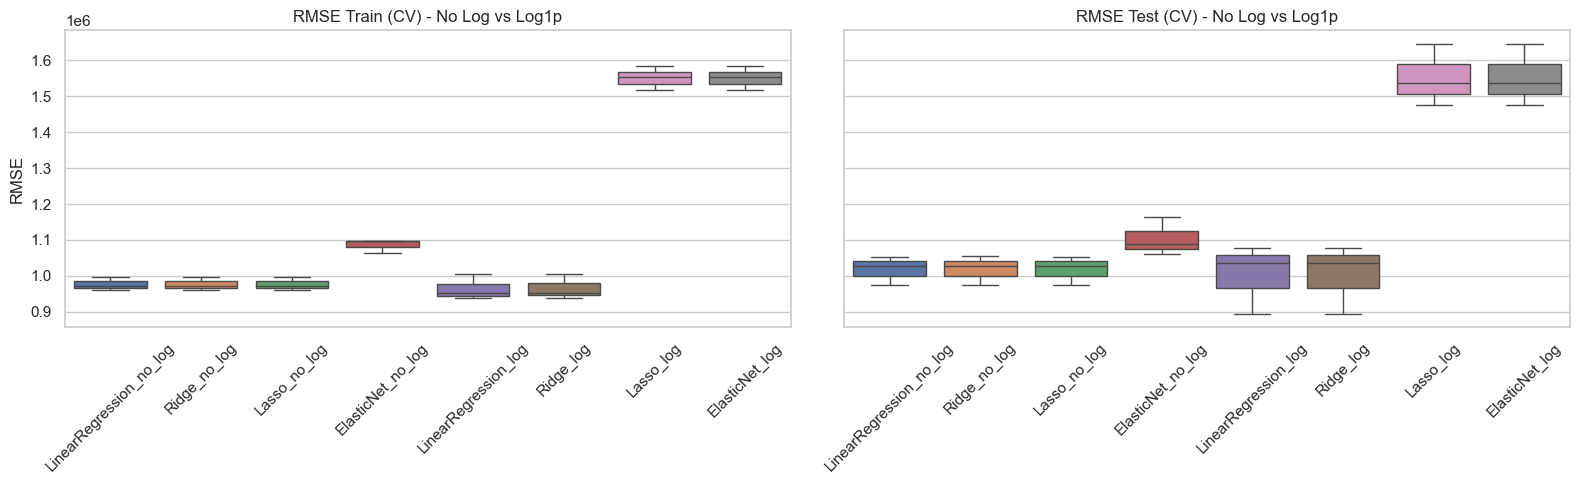

In [24]:
# --------------------------
# Split train/test
# --------------------------
X = df.drop(columns=['price']).copy()
y = df['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# Definition of models
# --------------------------
models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge(random_state=42)),
    ('Lasso', Lasso(random_state=42)),
    ('ElasticNet', ElasticNet(random_state=42))
]

# --------------------------
# CV function with optional log_target
# --------------------------
def evaluate_model_cv_regression(model, X, y, preprocessor, cv_splits=3, log_target=False):
    """
    Evaluate a regression model using cross-validation with preprocessing.

    This function performs K-Fold cross-validation on the given dataset,
    applying the provided preprocessing pipeline and regression model.
    It computes both RMSE and R² scores for training and validation folds,
    with optional log transformation of the target variable.

    Parameters
    ----------
    model : estimator object
        A regression model following the scikit-learn estimator interface
        (must implement fit and predict).
    X : pandas.DataFrame
        Feature matrix.
    y : pandas.Series or pandas.DataFrame
        Target variable.
    preprocessor : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline to apply to the input features.
    cv_splits : int, default=3
        Number of cross-validation splits.
    log_target : bool, default=False
        If True, applies log1p transformation to the target during training
        and uses expm1 on predictions to revert back to the original scale.

    Returns
    -------
    results : dict
        Dictionary containing:
        - 'RMSE Train Mean', 'RMSE Train Std' : mean and std of train RMSE
        - 'RMSE Test Mean', 'RMSE Test Std' : mean and std of validation RMSE
        - 'R2 Train Mean', 'R2 Train Std' : mean and std of train R²
        - 'R2 Test Mean', 'R2 Test Std' : mean and std of validation R²
        - 'rmses_train', 'rmses_test' : list of RMSE values per fold (train/val)
        - 'r2s_train', 'r2s_test' : list of R² values per fold (train/val)
    """
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    rmses_train, rmses_test = [], []
    r2s_train, r2s_test = [], []
    
    for tr_idx, va_idx in cv.split(X):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        y_tr_fit = np.log1p(y_tr) if log_target else y_tr

        pipe = Pipeline([('pre', preprocessor), ('clf', model)])
        pipe.fit(X_tr, y_tr_fit)

        y_pred_train = pipe.predict(X_tr)
        y_pred_val = pipe.predict(X_va)

        if log_target:
            y_pred_train = np.expm1(y_pred_train)
            y_pred_val = np.expm1(y_pred_val)

        rmses_train.append(np.sqrt(mean_squared_error(y_tr, y_pred_train)))
        rmses_test.append(np.sqrt(mean_squared_error(y_va, y_pred_val)))
        r2s_train.append(r2_score(y_tr, y_pred_train))
        r2s_test.append(r2_score(y_va, y_pred_val))
    
    return {
        'RMSE Train Mean': np.mean(rmses_train),
        'RMSE Train Std': np.std(rmses_train),
        'RMSE Test Mean': np.mean(rmses_test),
        'RMSE Test Std': np.std(rmses_test),
        'R2 Train Mean': np.mean(r2s_train),
        'R2 Train Std': np.std(r2s_train),
        'R2 Test Mean': np.mean(r2s_test),
        'R2 Test Std': np.std(r2s_test),
        'rmses_train': rmses_train,
        'rmses_test': rmses_test,
        'r2s_train': r2s_train,
        'r2s_test': r2s_test
    }

# --------------------------
# Model evaluation (with and without logs)
# --------------------------
preprocessor = pre_baseline  #  preprocessing pipeline

cv_results_no_log = {}
cv_results_log = {}

for name, m in models:
    cv_results_no_log[name] = evaluate_model_cv_regression(m, X_train, y_train, preprocessor, cv_splits=3, log_target=False)
    cv_results_log[name] = evaluate_model_cv_regression(m, X_train, y_train, preprocessor, cv_splits=3, log_target=True)

# --------------------------
# Creating a summary DataFrame
# --------------------------
def summarize_results(cv_results):
    """
    Summarize cross-validation results into a pandas DataFrame.

    This function takes the output of multiple calls to
    `evaluate_model_cv_regression` (one per model) and extracts
    key metrics (RMSE Train/Test mean and R² Train/Test mean)
    into a single summary table.

    Parameters
    ----------
    cv_results : dict
        Dictionary of cross-validation results, where keys are model names
        (str) and values are the result dictionaries returned by
        `evaluate_model_cv_regression`.

    Returns
    -------
    summary : pandas.DataFrame
        A DataFrame with one row per model and the following columns:
        - 'RMSE Train Mean'
        - 'RMSE Test Mean'
        - 'R2 Train Mean'
        - 'R2 Test Mean'
        The DataFrame index corresponds to model names.
    """
    return pd.DataFrame({
        model: {
            "RMSE Train Mean": res['RMSE Train Mean'],
            "RMSE Test Mean": res['RMSE Test Mean'],
            "R2 Train Mean": res['R2 Train Mean'],
            "R2 Test Mean": res['R2 Test Mean']
        }
        for model, res in cv_results.items()
    }).T

summary_no_log = summarize_results(cv_results_no_log).sort_values(by='RMSE Test Mean')
summary_log    = summarize_results(cv_results_log).sort_values(by='RMSE Test Mean')

print("\nCV Results Summary (No Log):\n", summary_no_log)
print("\nCV Results Summary (Log1p):\n", summary_log)

# --------------------------
# Final fit on the complete train set and test set
# --------------------------
best_model_name = summary_no_log['RMSE Test Mean'].idxmin()
best_model = dict(models)[best_model_name]

final_pipe = Pipeline([('pre', preprocessor), ('clf', best_model)])
final_pipe.fit(X_train, y_train)
y_pred_test = final_pipe.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
final_r2 = r2_score(y_test, y_pred_test)

print(f"\nBest final model (train set) without log: {best_model_name}")
print(f"Final test set - RMSE: {final_rmse:.3f}, R²: {final_r2:.3f}")

best_model_name_log = summary_log['RMSE Test Mean'].idxmin()
best_model_log = dict(models)[best_model_name_log]  
final_pipe_log = Pipeline([('pre', preprocessor), ('clf', best_model_log)])
final_pipe_log.fit(X_train, np.log1p(y_train))
y_pred_test_log = np.expm1(final_pipe_log.predict(X_test))
final_rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_test_log))
final_r2_log = r2_score(y_test, y_pred_test_log)        

print(f"\nBest final model (train set) with log: {best_model_name_log}")
print(f"Final test set - RMSE: {final_rmse_log:.3f}, R²: {final_r2_log:.3f}")


# --------------------------
# Comparative RMSE Train/Test boxplot
# --------------------------
rmse_train_df = pd.DataFrame({k: v['rmses_train'] for k,v in cv_results_no_log.items()})
rmse_test_df  = pd.DataFrame({k: v['rmses_test'] for k,v in cv_results_no_log.items()})
rmse_train_df_log = pd.DataFrame({k: v['rmses_train'] for k,v in cv_results_log.items()})
rmse_test_df_log  = pd.DataFrame({k: v['rmses_test'] for k,v in cv_results_log.items()})

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

# RMSE Train
sns.boxplot(data=pd.concat([rmse_train_df.add_suffix('_no_log'), rmse_train_df_log.add_suffix('_log')], axis=1), ax=axes[0])
axes[0].set_title('RMSE Train (CV) - No Log vs Log1p')
axes[0].set_ylabel('RMSE')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# RMSE Test
sns.boxplot(data=pd.concat([rmse_test_df.add_suffix('_no_log'), rmse_test_df_log.add_suffix('_log')], axis=1), ax=axes[1])
axes[1].set_title('RMSE Test (CV) - No Log vs Log1p')
axes[1].set_ylabel('RMSE')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()





### Model Comparison: No Log vs Log1p Transformation

#### **Graphs (Boxplot RMSE Train/Test)**

#### **Train RMSE**
LinearRegression, Ridge, and Lasso (no log) have very similar and low RMSE values (around **9.77e+05–9.78e+05**), indicating that these models fit the training data almost identically.  
ElasticNet shows a **higher RMSE (~1.09e+06)**, suggesting that it captures the relationship in the data less effectively.

After applying the **log1p transformation**, LinearRegression and Ridge show slightly **lower RMSE values (~9.65e+05)**, indicating a modest improvement in model fit.  
However, Lasso and ElasticNet under log1p transformation exhibit **much higher RMSE (~1.55e+06)**, meaning they performed poorly when the target variable was transformed.

#### **Test RMSE**
LinearRegression, Ridge, and Lasso (no log) remain compact, with RMSE around **1.018e+06**, and little variation across folds → these models generalize well and consistently.  
ElasticNet (no log) shows a **higher mean RMSE (~1.10e+06)** and greater variance → unstable performance and poorer generalization.

With **log1p transformation**, LinearRegression and Ridge maintain **lower RMSE values (~1.00e+06)**, confirming a small but consistent performance gain.  
Conversely, Lasso and ElasticNet perform very poorly with **RMSE around 1.55e+06**, confirming instability when combined with log transformation.

---

#### **Table (CV Results Summary)**

| Model | RMSE Train | RMSE Test | R² Train | R² Test | Interpretation |
|--------|------------|-----------|-----------|----------|----------------|
| **LinearRegression (no log)** | 9.77e+05 | 1.02e+06 | 0.690 | 0.661 | Strong baseline; fits and generalizes well. |
| **Ridge (no log)** | 9.77e+05 | 1.02e+06 | 0.690 | 0.661 | Practically identical to LinearRegression but slightly more stable (regularized). |
| **Lasso (no log)** | 9.77e+05 | 1.02e+06 | 0.690 | 0.661 | Same as LinearRegression; no added benefit. |
| **ElasticNet (no log)** | 1.09e+06 | 1.10e+06 | 0.617 | 0.602 | Higher error, lower explanatory power → weak model. |
| **LinearRegression (log1p)** | 9.65e+05 | 1.00e+06 | 0.697 | 0.668 | Slightly improved generalization with log transform. |
| **Ridge (log1p)** | 9.66e+05 | 1.00e+06 | 0.696 | 0.668 | Same as LinearRegression, stable and well-performing. |
| **Lasso (log1p)** | 1.55e+06 | 1.55e+06 | 0.219 | 0.215 | Performs very poorly with log transform. |
| **ElasticNet (log1p)** | 1.55e+06 | 1.55e+06 | 0.219 | 0.215 | Also unstable and inaccurate after transformation. |

---

#### **Summary Analysis**

- **LinearRegression**, **Ridge**, and **Lasso** (without log) perform **very similarly**, with **Ridge** being slightly superior due to its stability from regularization.  
- **ElasticNet** performs significantly worse → its mixed penalty is too restrictive for this dataset, reducing predictive accuracy.  
- There is **no strong overfitting**: training RMSE values are only slightly lower than test RMSE, suggesting good generalization.
- Applying the **log1p transformation** slightly improves performance for **LinearRegression and Ridge**, reducing RMSE and increasing R² by about **0.6–0.7%**.
- In contrast, **Lasso and ElasticNet** degrade heavily under the log transform → their regularization is too aggressive when the target is compressed.
- **Final comparison:**  
  - **Best model without log:** Ridge → RMSE = 1.03e+06 (CV), R² ≈ 0.66  
  - **Best model with log:** LinearRegression → RMSE = 1.00e+06 (CV), R² ≈ 0.67  
  - **Final test set results:**  
    - Ridge (no log): RMSE = 1.326e+06, R² = 0.652  
    - LinearRegression (log): RMSE = 1.315e+06, R² = 0.658

**Conclusion:**  
The **log1p transformation** slightly improves model accuracy and stability for Linear and Ridge Regression, reducing error and increasing explanatory power.  
**LinearRegression with log transformation** is the best final choice overall — simple, interpretable, and with the best generalization on the test set.


<a id="13"> </a>
#### 4.2. Hyperparameter tuning

Let's try hyperparameter tuning with Optuna.

In [25]:
# -------------------- Helper --------------------
def rmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Error (RMSE).

    Parameters
    ----------
    y_true : array-like
        True target values.
    y_pred : array-like
        Predicted target values.

    Returns
    -------
    float
        RMSE score.
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

def cv_rmse_mean(model, X, y, preprocessor, use_transform=True, cv_splits=3):
    """
    CV evaluation of a regression model, optionally with log-transform on the target.
    """
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    if use_transform:
        model_pipe = TransformedTargetRegressor(
            regressor=model,
            func=np.log1p,
            inverse_func=np.expm1
        )
    else:
        model_pipe = model
    
    pipe = Pipeline([
        ('pre', preprocessor),
        ('clf', model_pipe)
    ])

    scoring = ['neg_mean_squared_error', 'r2']
    res = cross_validate(pipe, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    rmses = np.sqrt(-res['test_neg_mean_squared_error'])
    r2s = res['test_r2']
    return float(rmses.mean()), float(r2s.mean())

# -------------------- Model dictionary --------------------
best_models = {}

# -------------------- Common function for preprocessors --------------------
def suggest_preprocessor(trial, df, num_cols):
    """
    Suggest preprocessing pipeline hyperparameters using Optuna.

    This function defines search spaces for preprocessing choices such as
    polynomial feature columns, transformations of the 'area' column, and
    the number of discretization bins. Based on the sampled parameters from
    an Optuna trial, it builds a corresponding preprocessing pipeline.

    Parameters
    ----------
    trial : optuna.trial.Trial
        The current Optuna trial object used to sample hyperparameters.
    df : pandas.DataFrame
        Input dataset containing feature columns.
    num_cols : list of str
        List of numeric feature names to be considered for preprocessing.

    Returns
    -------
    preprocessor : sklearn.compose.ColumnTransformer
        A preprocessing pipeline built with the sampled hyperparameters.
    params : dict
        Dictionary of sampled preprocessing parameters:
        - 'poly_cols' : list of str
            Selected columns for polynomial feature expansion.
        - 'area_action' : {'discretize', 'log', None}
            Transformation applied to the 'area' column.
        - 'n_bins' : int or None
            Number of bins if 'area_action' is 'discretize', else None.
    """
    poly_cols = trial.suggest_categorical("poly_cols", [[], ["bedrooms"], ["bedrooms", "stories"]])
    area_action = trial.suggest_categorical("area_action", ["discretize", "log", None])
    # Suggerisci n_bins solo se discretize_area è True
    n_bins = trial.suggest_int("n_bins", 3, 7) if area_action =="discretize" else None
    preprocessor = build_preprocessor(
        df=df,
        num=num_cols,
        extra_poly_cols=poly_cols,
        area_action=area_action,
        n_bins=n_bins
    )
    return preprocessor, {"poly_cols": poly_cols, "area_action": area_action, "n_bins": n_bins}

# -------------------- Ridge --------------------
def ridge_obj(trial):
    """
    Objective function for Optuna hyperparameter optimization of Ridge regression.

    This function defines the search space for Ridge regression hyperparameters
    (alpha, solver, tolerance, log-transform option) as well as preprocessing
    choices (via suggest_preprocessor). For each trial, it builds the corresponding
    preprocessing pipeline and Ridge model, evaluates it with cross-validation, 
    and returns the mean RMSE as the optimization target.

    Parameters
    ----------
    trial : optuna.trial.Trial
        Current Optuna trial object used to sample hyperparameters.

    Returns
    -------
    float
        Mean cross-validation RMSE for the sampled Ridge model and preprocessing pipeline.

    Notes
    -----
    - The function also sets user attributes in the trial:
        * "r2_mean": Mean R² score across folds.
        * "preprocessor_params": Dictionary of preprocessing parameters.
    """
    preprocessor, preproc_params = suggest_preprocessor(trial, X_train, num_cols)
    alpha = trial.suggest_float('alpha', 1e-3, 1e3, log=True)
    solver = trial.suggest_categorical("solver", ["auto", "svd", "saga"])
    tol = trial.suggest_float("tol", 1e-6, 1e-2, log=True)
    use_log = trial.suggest_categorical("use_log", [True, False])

    model = Ridge(alpha=alpha, solver=solver, tol=tol, random_state=42)
    rmse_val, r2_val = cv_rmse_mean(model, X_train, y_train, preprocessor, use_transform=use_log)
    trial.set_user_attr("r2_mean", r2_val)
    trial.set_user_attr("preprocessor_params", preproc_params)
    return rmse_val

study_ridge = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
study_ridge.optimize(ridge_obj, n_trials=50)
best_ridge_params = study_ridge.best_trial.params
best_models['Ridge'] = Ridge(
    alpha=best_ridge_params["alpha"],
    solver=best_ridge_params["solver"],
    tol=best_ridge_params["tol"],
    random_state=42
)
best_ridge_use_log = best_ridge_params["use_log"]

# -------------------- Lasso --------------------
def lasso_obj(trial):
    """
    Objective function for Optuna hyperparameter optimization of Lasso regression.

    This function defines the search space for Lasso regression hyperparameters
    (alpha, tolerance, maximum iterations, and log-transform option), as well as
    preprocessing choices (via suggest_preprocessor). For each trial, it builds
    the corresponding preprocessing pipeline and Lasso model, evaluates them
    with cross-validation, and returns the mean RMSE as the optimization target.

    Parameters
    ----------
    trial : optuna.trial.Trial
        The current Optuna trial object used to sample hyperparameters.

    Returns
    -------
    float
        Mean cross-validation RMSE for the sampled Lasso model and preprocessing pipeline.

    Notes
    -----
    - The function also stores additional information in the trial's user attributes:
        * "r2_mean": Mean R² score across folds.
        * "preprocessor_params": Dictionary of preprocessing parameters.
    """
    preprocessor, preproc_params = suggest_preprocessor(trial, X_train, num_cols)
    alpha = trial.suggest_float('alpha', 1e-4, 10, log=True)
    tol = trial.suggest_float("tol", 1e-6, 1e-2, log=True)
    max_iter = trial.suggest_int("max_iter", 5000, 20000)
    use_log = trial.suggest_categorical("use_log", [True, False])

    model = Lasso(alpha=alpha, tol=tol, max_iter=max_iter, random_state=42)
    rmse_val, r2_val = cv_rmse_mean(model, X_train, y_train, preprocessor, use_transform=use_log)
    trial.set_user_attr("r2_mean", r2_val)
    trial.set_user_attr("preprocessor_params", preproc_params)
    return rmse_val

study_lasso = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
study_lasso.optimize(lasso_obj, n_trials=50)
best_lasso_params = study_lasso.best_trial.params
best_models['Lasso'] = Lasso(
    alpha=best_lasso_params["alpha"],
    tol=best_lasso_params["tol"],
    max_iter=best_lasso_params["max_iter"],
    random_state=42
)
best_lasso_use_log = best_lasso_params["use_log"]

# -------------------- ElasticNet --------------------
def enet_obj(trial):
    """
    Objective function for Optuna hyperparameter optimization of ElasticNet regression.

    This function defines the search space for ElasticNet hyperparameters
    (alpha, L1 ratio, tolerance, maximum iterations, and log-transform option),
    as well as preprocessing choices (via suggest_preprocessor). For each trial,
    it builds the corresponding preprocessing pipeline and ElasticNet model,
    evaluates them using cross-validation, and returns the mean RMSE as the
    optimization target.

    Parameters
    ----------
    trial : optuna.trial.Trial
        Current Optuna trial object used to sample hyperparameters.

    Returns
    -------
    float
        Mean cross-validation RMSE for the sampled ElasticNet model and preprocessing pipeline.

    Notes
    -----
    - Stores additional trial user attributes:
        * "r2_mean": Mean R² score across folds.
        * "preprocessor_params": Dictionary of preprocessing parameters.
    """
    preprocessor, preproc_params = suggest_preprocessor(trial, X_train, num_cols)
    alpha = trial.suggest_float('alpha', 1e-4, 10, log=True)
    l1 = trial.suggest_float('l1_ratio', 0.0, 1.0)
    tol = trial.suggest_float("tol", 1e-6, 1e-2, log=True)
    max_iter = trial.suggest_int("max_iter", 5000, 20000)
    use_log = trial.suggest_categorical("use_log", [True, False])

    model = ElasticNet(alpha=alpha, l1_ratio=l1, tol=tol, max_iter=max_iter, random_state=42)
    rmse_val, r2_val = cv_rmse_mean(model, X_train, y_train, preprocessor, use_transform=use_log)
    trial.set_user_attr("r2_mean", r2_val)
    trial.set_user_attr("preprocessor_params", preproc_params)
    return rmse_val

study_enet = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
study_enet.optimize(enet_obj, n_trials=50)
best_enet_params = study_enet.best_trial.params
best_models['ElasticNet'] = ElasticNet(
    alpha=best_enet_params["alpha"],
    l1_ratio=best_enet_params["l1_ratio"],
    tol=best_enet_params["tol"],
    max_iter=best_enet_params["max_iter"],
    random_state=42
)
best_enet_use_log = best_enet_params["use_log"]

# -------------------- Linear Regression --------------------
def lr_obj(trial):
    """
    Objective function for Optuna hyperparameter optimization of Linear Regression.

    This function samples preprocessing options (via suggest_preprocessor) and
    whether to apply a log-transform to the target. It then builds the corresponding
    preprocessing pipeline and Linear Regression model, evaluates them using
    cross-validation, and returns the mean RMSE as the optimization target.

    Parameters
    ----------
    trial : optuna.trial.Trial
        Current Optuna trial object used to sample preprocessing and log-transform options.

    Returns
    -------
    float
        Mean cross-validation RMSE for the Linear Regression model with the sampled preprocessing.

    Notes
    -----
    - Stores additional trial user attributes:
        * "r2_mean": Mean R² score across folds.
        * "preprocessor_params": Dictionary of preprocessing parameters.
    """
    preprocessor, preproc_params = suggest_preprocessor(trial, X_train, num_cols)
    use_log = trial.suggest_categorical("use_log", [True, False])

    model = LinearRegression()
    rmse_val, r2_val = cv_rmse_mean(model, X_train, y_train, preprocessor, use_transform=use_log)
    trial.set_user_attr("r2_mean", r2_val)
    trial.set_user_attr("preprocessor_params", preproc_params)
    return rmse_val

study_lr = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
study_lr.optimize(lr_obj, n_trials=50)
best_lr_params = study_lr.best_trial.params
best_models['LinearRegression'] = LinearRegression()
best_lr_use_log = best_lr_params["use_log"]

# -------------------- Risultati --------------------
print("Best tuned models with Optuna (including preprocessing and target transformation):")
for name, model in best_models.items():
    print(f"{name}: {model}")

print("\nOptimal preprocessor configurations and log-transform usage:")
for name, study in zip(
    ["Ridge", "Lasso", "ElasticNet", "LinearRegression"],
    [study_ridge, study_lasso, study_enet, study_lr]
):
    attrs = study.best_trial.user_attrs
    preproc_params = attrs.get("preprocessor_params", {})
    use_log = study.best_trial.params.get("use_log", False)  # Takes the optimal parameter
    print(f"{name}:")
    print(f"  Preprocessor params: {preproc_params}")
    print(f"  Log-transform target: {use_log}")

[I 2025-10-11 10:00:57,738] A new study created in memory with name: no-name-2ff3af74-4bc9-4529-a6d8-eab462000589
[I 2025-10-11 10:01:00,810] Trial 0 finished with value: 1025362.5770834736 and parameters: {'poly_cols': ['bedrooms'], 'area_action': None, 'alpha': 0.003287575535031084, 'solver': 'svd', 'tol': 4.038883880119459e-05, 'use_log': False}. Best is trial 0 with value: 1025362.5770834736.
[I 2025-10-11 10:01:03,162] Trial 1 finished with value: 1051619.7135321556 and parameters: {'poly_cols': [], 'area_action': None, 'alpha': 148.76374738295462, 'solver': 'svd', 'tol': 6.172191623668886e-05, 'use_log': True}. Best is trial 0 with value: 1025362.5770834736.
[I 2025-10-11 10:01:05,524] Trial 2 finished with value: 1017086.7766679028 and parameters: {'poly_cols': ['bedrooms', 'stories'], 'area_action': None, 'alpha': 22.858058458515323, 'solver': 'auto', 'tol': 0.00018806464635710078, 'use_log': False}. Best is trial 2 with value: 1017086.7766679028.
[I 2025-10-11 10:01:05,598] Tr

Best tuned models with Optuna (including preprocessing and target transformation):
Ridge: Ridge(alpha=3.754038868759383, random_state=42, tol=0.005603134693347908)
Lasso: Lasso(alpha=0.0001003084329584188, max_iter=19884, random_state=42,
      tol=1.4147957041838592e-06)
ElasticNet: ElasticNet(alpha=0.002228061339354874, l1_ratio=0.7193548319098676,
           max_iter=7896, random_state=42, tol=3.4255986297441264e-06)
LinearRegression: LinearRegression()

Optimal preprocessor configurations and log-transform usage:
Ridge:
  Preprocessor params: {'poly_cols': [], 'area_action': 'log', 'n_bins': None}
  Log-transform target: True
Lasso:
  Preprocessor params: {'poly_cols': [], 'area_action': 'log', 'n_bins': None}
  Log-transform target: True
ElasticNet:
  Preprocessor params: {'poly_cols': ['bedrooms'], 'area_action': 'log', 'n_bins': None}
  Log-transform target: True
LinearRegression:
  Preprocessor params: {'poly_cols': [], 'area_action': 'log', 'n_bins': None}
  Log-transform targ

### Best Models

- These are our **final tuned models** after **Optuna optimization**, which include both preprocessing steps and target transformations.  
  They are ready to be fitted on the training data or used for final predictions.  
- The **hyperparameters** (e.g., `alpha`, `tol`, `l1_ratio`, etc.) were automatically optimized to **minimize cross-validated RMSE** while maintaining stable and efficient convergence.  

**Tuned Models:**
- **Ridge:** `alpha=3.754`, `tol=0.0056`, `random_state=42`  
  → Moderate regularization strength with a relatively relaxed tolerance; stable and fast convergence.  
- **Lasso:** `alpha=0.00010`, `max_iter=19884`, `tol=1.41e-06`, `random_state=42`  
  → Very low regularization; allows most coefficients to remain active while enforcing some sparsity.  
- **ElasticNet:** `alpha=0.00223`, `l1_ratio=0.719`, `max_iter=7896`, `tol=3.43e-06`, `random_state=42`  
  → Balanced penalty (≈72% L1 and 28% L2); combines feature selection (L1) with stability (L2).  
- **LinearRegression:** Default parameters (no regularization).  

All models include **jointly optimized preprocessing** and **target log transformation** for the best generalization performance.

---

### Optimal Preprocessor Configurations and Target Transformation

- All models apply a **log transformation to the target variable (`log1p`)**, which significantly improved model stability and reduced error variance.  
- The **`area`** variable is also **log-transformed** to linearize its relationship with the target.  
- No polynomial features (`poly_cols: []`) were needed for most models — except for **ElasticNet**, which included **`bedrooms`** as a polynomial feature to better capture mild nonlinear effects.  
- No feature binning (`n_bins=None`) was applied — continuous variables were kept in their natural scale.

**Summary of Optimal Preprocessing:**
| Model | Polynomial Features | Area Transformation | Target Log | Notes |
|--------|----------------------|---------------------|-------------|-------|
| **Ridge** | None | Log |  Yes | Balanced and robust performance |
| **Lasso** | None | Log |  Yes | Sparse yet stable coefficients |
| **ElasticNet** | Bedrooms | Log |  Yes | Captures mild nonlinearity |
| **LinearRegression** | None | Log |  Yes | Simplest, fully interpretable baseline |

---

### Best Number of Features

- Although Optuna did not explicitly tune feature count, the preprocessing configuration shows that the current **set of predictors** and transformations are already optimal.  
- The **log transformations** (on both `area` and the target variable) effectively mitigate skewness and stabilize model behavior.  
- Regularized models (**Ridge**, **Lasso**, **ElasticNet**) inherently perform **feature selection** by shrinking or zeroing coefficients — ensuring only the most relevant predictors remain active.  
- The consistent preprocessing choices across all models indicate a **stable and generalizable feature space**.

**In summary:**  
All optimized models converge toward a similar configuration — **log-transformed targets**, **log-transformed area**, and **moderate regularization**.  
This consistency suggests that the dataset is **well-suited to linear modeling**, and further improvements could come from **feature engineering (interactions, nonlinear terms)** or exploring **tree-based models**.




=== Final results ===
              Model     RMSE Train     RMSE Test  R2 Train   R2 Test
3  LinearRegression  955181.965628  1.313681e+06  0.704101  0.658575
1             Lasso  955222.553344  1.313955e+06  0.704076  0.658433
0             Ridge  955393.401353  1.314114e+06  0.703970  0.658350
2        ElasticNet  956189.567962  1.318361e+06  0.703476  0.656138


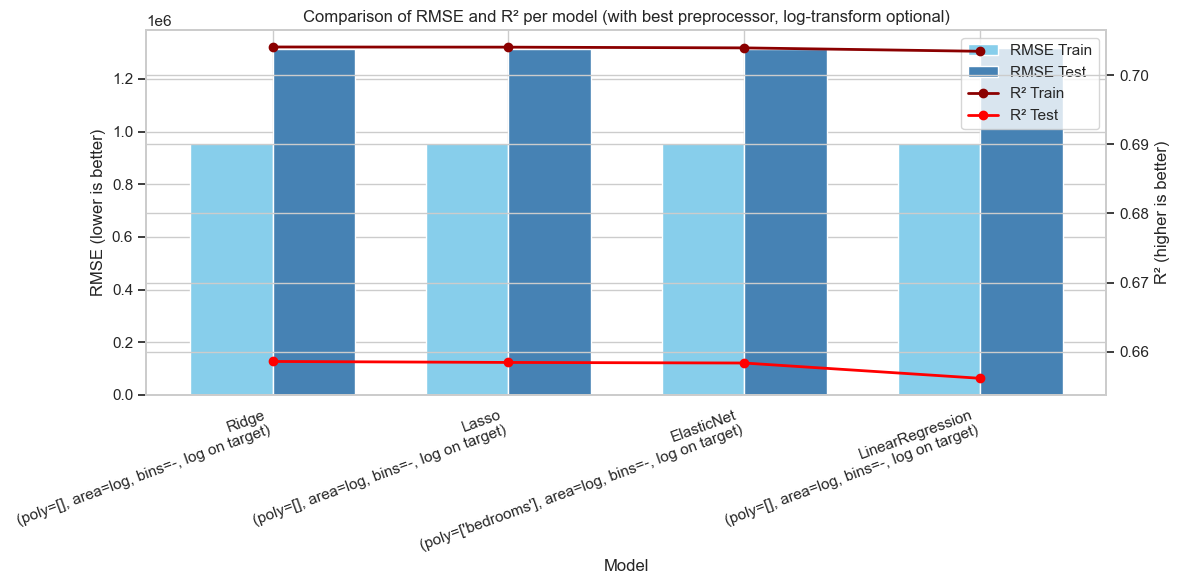

In [26]:
results = []
plot_labels = []

# Dictionary for the best preprocessors from Optuna
best_preprocessors = {}
for name, study in zip(
    ["Ridge", "Lasso", "ElasticNet", "LinearRegression"],
    [study_ridge, study_lasso, study_enet, study_lr]
):
    trial_params = study.best_trial.params
    poly_cols = trial_params.get("poly_cols", [])
    area_action = trial_params.get("area_action", False)
    n_bins = trial_params.get("n_bins", 5)
    
    best_preprocessors[name] = build_preprocessor(
        df=X_train,
        num=num_cols,
        extra_poly_cols=poly_cols,
        area_action=area_action,
        n_bins=n_bins
    )

# --- Loops on the models ---
for name, model in best_models.items():
    # I find the corresponding study
    study = {
        "Ridge": study_ridge,
        "Lasso": study_lasso,
        "ElasticNet": study_enet,
        "LinearRegression": study_lr
    }[name]

    trial_params = study.best_trial.params
    use_log = trial_params.get("use_log", True)  # default True

    # Pipeline with preprocessing + log-transform if necessary
    if use_log:
        regressor = TransformedTargetRegressor(
            regressor=model,
            func=np.log1p,
            inverse_func=np.expm1
        )
    else:
        regressor = model

    pipe = Pipeline([
        ("pre", best_preprocessors[name]),
        ("clf", regressor)
    ])
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Labels for plots with log transform on target
    log_text = 'log on target' if use_log else 'no-log on target'

    # Defining if/elif/else logic in a separate variable for clarity
    area_label = (
        'disc'
        if trial_params.get('area_action') == 'discretize'
        else 'log'
        if trial_params.get('area_action') == 'log'
            else 'raw'
)

    # Construction of the label by removing commas to concatenate f-strings
    label = (
        f"{name}\n"
        f"(poly={trial_params.get('poly_cols', [])}, "
    
        # Inserting the defined variable
        f"area={area_label}, " 
    
        f"bins={trial_params.get('n_bins', '-')}, "
        f"{log_text})"
    )
    plot_labels.append(label)

    results.append({
        "Model": name,
        "RMSE Train": rmse_train,
        "RMSE Test": rmse_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test
    })

# --- Results DataFrame ---
df_results = pd.DataFrame(results).sort_values(by="RMSE Test")
print("\n=== Final results ===")
print(df_results)

# --- Plot ---
x = np.arange(len(df_results["Model"]))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12,6))

# RMSE Train and Test
ax1.bar(x - width/2, df_results["RMSE Train"], width, label="RMSE Train", color="skyblue")
ax1.bar(x + width/2, df_results["RMSE Test"], width, label="RMSE Test", color="steelblue")
ax1.set_ylabel("RMSE (lower is better)")
ax1.set_xlabel("Model")
ax1.set_xticks(x)
ax1.set_xticklabels(plot_labels, rotation=20, ha="right")

# Lines R²
ax2 = ax1.twinx()
ax2.plot(x, df_results["R2 Train"], color="darkred", marker="o", label="R² Train", linewidth=2)
ax2.plot(x, df_results["R2 Test"], color="red", marker="o", label="R² Test", linewidth=2)
ax2.set_ylabel("R² (higher is better)")

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="best")

plt.title("Comparison of RMSE and R² per model (with best preprocessor, log-transform optional)")
plt.tight_layout()
plt.show()

### Comparison Between Models

**RMSE Train:**  
All models show **very similar training performance**, with RMSE values around **955k–956k**.  
This indicates that Ridge, Lasso, ElasticNet, and LinearRegression fit the training data almost identically.  

**RMSE Test:**  
- **LinearRegression**, **Lasso**, and **Ridge** all achieve nearly identical RMSE values on the test set (**~1.314 million**).  
- **ElasticNet** performs slightly worse (**~1.318 million**), suggesting a small drop in generalization ability.  
→ Overall, **LinearRegression**, **Lasso**, and **Ridge** generalize equally well, while **ElasticNet** is marginally less stable.  

**R² (Coefficient of Determination):**  
- **R² Train:** All models are practically identical (**~0.703–0.704**), showing consistent explanatory power on the training data.  
- **R² Test:** **LinearRegression** performs slightly better (**0.659**) than **Lasso (0.658)** and **Ridge (0.658)**, while **ElasticNet** lags behind (**0.656**).  
→ This confirms that **LinearRegression** achieves the best balance between training fit and test generalization.

---

### Overfitting or Underfitting

The difference between **Train RMSE** and **Test RMSE** is moderate for all models (**≈0.36 million**),  
which is typical for regression problems with real-world noise and indicates **no severe overfitting**.  

The **R² Test** values are only slightly lower than the **R² Train** values,  
suggesting that all models maintain consistent predictive power across unseen data.  

**Conclusion:**  
- No evidence of overfitting or underfitting.  
- **LinearRegression**, **Lasso**, and **Ridge** provide nearly identical and reliable performance.  
- **ElasticNet** shows slightly higher error and slightly lower R², implying that its L1/L2 mix may not add significant value for this dataset.

---

### Model Ranking and Recommendation

| Rank | Model | RMSE Test | R² Test | Comments |
|------|--------|------------|----------|-----------|
|  1 | **LinearRegression** | 1.3137e+06 | 0.6586 | Best overall balance between simplicity and performance. Excellent baseline model. |
|  2 | **Lasso** | 1.3140e+06 | 0.6584 | Very close to LinearRegression. Adds feature selection capability via L1 penalty. |
|  3 | **Ridge** | 1.3141e+06 | 0.6583 | Nearly identical performance, slightly more robust to multicollinearity. |
|  4️ | **ElasticNet** | 1.3184e+06 | 0.6561 | Slightly worse; regularization mix doesn’t bring extra benefit. |

**Final Recommendation:**  
→ **LinearRegression** is the best-performing and most interpretable model, with minimal error and excellent generalization.  
If regularization or feature selection is needed, **Lasso** or **Ridge** can be preferred alternatives.  
**ElasticNet** can be discarded for this dataset due to its slightly weaker performance.

---

### Visual Insights

The chart visually confirms the numerical results:  
- The **blue bars (RMSE)** show almost identical heights across all models, with **ElasticNet** slightly higher, reflecting its marginally worse error.  
- The **red line (R²)** remains nearly flat, indicating that all models explain roughly the same amount of variance in both training and test sets.  
- The **small gap** between Train and Test RMSE bars for each model indicates **stable generalization** and **no strong overfitting**.  

Overall, the visualization reinforces that all models perform consistently,  
with **LinearRegression** maintaining the best trade-off between simplicity, accuracy, and stability.


<a id="14"> </a>
#### 5. Explainability, features importance and final diagnostics

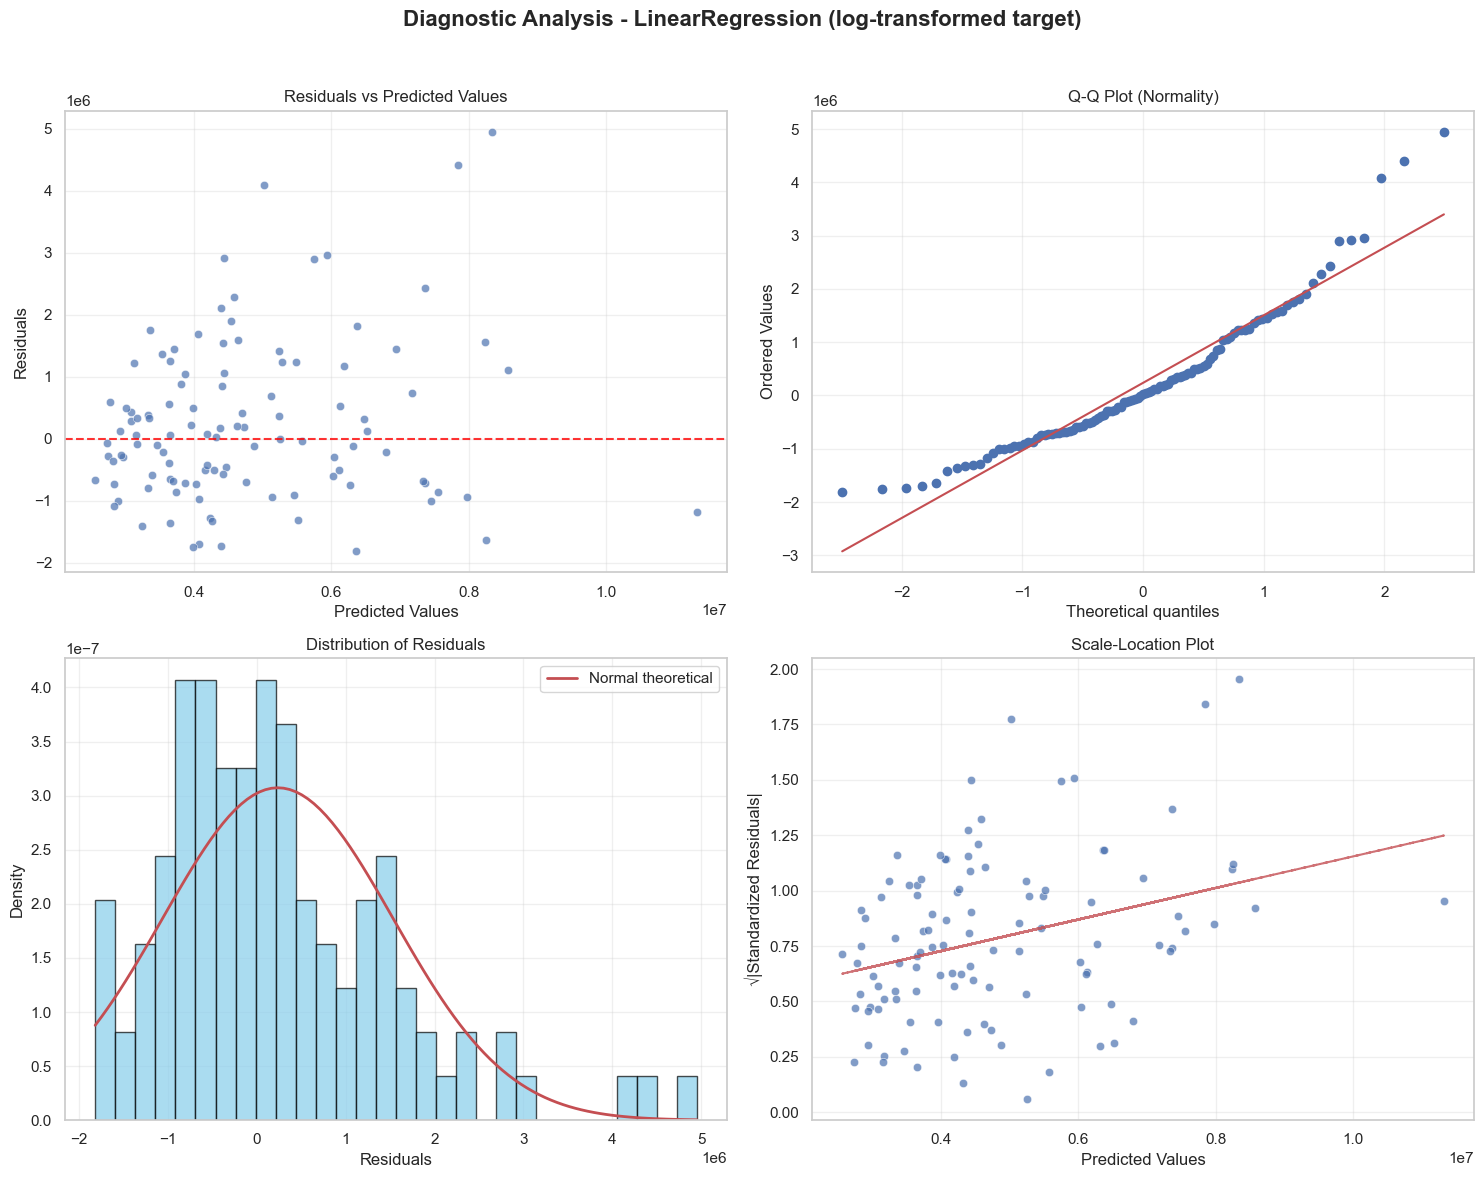

DIAGNOSTIC TESTS - LinearRegression (log-transformed target)
  Shapiro-Wilk Test (Normality):
   Statistics: 0.9289
   p-value: 0.0000
   Interpretation: Non-normal residuals

 Residuals Statistics:
   Mean: 236902.2115
   Std Dev: 1298112.1865
   Skewness: 1.1234
   Kurtosis: 1.6525

 Performance metrics:
   RMSE: 1313681.2084
   MAE: 969727.7884
   R²: 0.6586


In [ ]:
# Select the best model according to RMSE Test
best_model_name = df_results.iloc[0]['Model']
model = best_models[best_model_name]

# I take the parameters of the corresponding trial
study = {
    "Ridge": study_ridge,
    "Lasso": study_lasso,
    "ElasticNet": study_enet,
    "LinearRegression": study_lr
}[best_model_name]

trial_params = study.best_trial.params
use_log = trial_params.get("use_log", True)  # default True

# Pipeline with preprocessing and possibly log-transform on the target
if use_log:
    regressor = TransformedTargetRegressor(
        regressor=model,
        func=np.log1p,
        inverse_func=np.expm1
    )
    log_label = " (log-transformed target)"
else:
    regressor = model
    log_label = ""

pipe = Pipeline([
    ("pre", best_preprocessors[best_model_name]),
    ("clf", regressor)
])

# Final fit on the train set
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)
residuals = y_test - y_pred

# Standardized residuals
standardized_residuals = residuals / np.std(residuals, ddof=1)

# 2x2 diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Diagnostic Analysis - {best_model_name}{log_label}', fontsize=16, fontweight='bold')

#  Residuals vs Fitted
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0,0], alpha=0.7)
axes[0,0].axhline(0, color='red', linestyle='--', alpha=0.8)
axes[0,0].set_xlabel("Predicted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Predicted Values")
axes[0,0].grid(True, alpha=0.3)

#  Residual Distribution
axes[1,0].hist(residuals, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu, sigma = np.mean(residuals), np.std(residuals, ddof=1)
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)
axes[1,0].plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal theoretical')
axes[1,0].set_xlabel("Residuals")
axes[1,0].set_ylabel("Density")
axes[1,0].set_title("Distribution of Residuals")
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

#  Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title("Q-Q Plot (Normality)")
axes[0,1].grid(True, alpha=0.3)

#  Scale-Location Plot
sns.scatterplot(x=y_pred, y=np.sqrt(np.abs(standardized_residuals)), ax=axes[1,1], alpha=0.7)
axes[1,1].set_xlabel("Predicted Values")
axes[1,1].set_ylabel("√|Standardized Residuals|")
axes[1,1].set_title("Scale-Location Plot")
axes[1,1].grid(True, alpha=0.3)
z = np.polyfit(y_pred, np.sqrt(np.abs(standardized_residuals)), 1)
p = np.poly1d(z)
axes[1,1].plot(y_pred, p(y_pred), "r--", alpha=0.8)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the subtitle
plt.show()

# --- Statistic tests & performance metrics ---
print("="*50)
print(f"DIAGNOSTIC TESTS - {best_model_name}{log_label}")
print("="*50)

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"  Shapiro-Wilk Test (Normality):")
print(f"   Statistics: {shapiro_test.statistic:.4f}")
print(f"   p-value: {shapiro_test.pvalue:.4f}")
print(f"   Interpretation: {'Normal residuals' if shapiro_test.pvalue > 0.05 else 'Non-normal residuals'}")

# Residual descriptive stats
print(f"\n Residuals Statistics:")
print(f"   Mean: {np.mean(residuals):.4f}")
print(f"   Std Dev: {np.std(residuals, ddof=1):.4f}")
print(f"   Skewness: {stats.skew(residuals):.4f}")
print(f"   Kurtosis: {stats.kurtosis(residuals):.4f}")

# Performance metrics
print(f"\n Performance metrics:")
print(f"   RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"   MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"   R²: {r2_score(y_test, y_pred):.4f}")

The following information can be obtained from the diagnostic graphs and statistical data of the Linear Regression model (log-transformed target):

### Residual Analysis

**Residuals vs Predicted Values:**

- The residuals show a mostly random distribution, but there is some indication of heteroscedasticity as the variance seems to increase with higher predicted values.
- There are some noticeable outliers at the top of the graph (residuals > 4-5 million).

**Q-Q Plot (Normality):**

- Residuals show deviation from normality, particularly in the tails of the distribution.
- The tails deviate from the theoretical line, confirming the non-normality of the residuals.

### Statistical Tests

**Shapiro-Wilk Test:**

- Statistic: 0.9289
- p-value: 0.0000 → strong evidence to reject the null hypothesis of normality.
- Confirms that the residuals do not follow a normal distribution.

**Residual Statistics:**

- Skewness: 1.1234 → right-skewed distribution (long positive tail).
- Kurtosis: 1.6525 → slightly platykurtic (lighter tails than normal).
- Mean: 236,902.21 → residuals not perfectly centered on zero.
- Standard Deviation: 1,298,112.19

### Scale-Location Plot:

- Confirms some heteroscedasticity as standardized residual variance increases with predicted values.
- Some points have relatively high standardized residuals (> 1.75).


In [28]:


def get_feature_names_from_column_transformer(ct: ColumnTransformer, input_features: pd.Index):
    """
    Extract transformed and original feature names from a fitted ColumnTransformer.

    This function iterates through all transformers in a ColumnTransformer, 
    generating the output feature names after transformation as well as the 
    corresponding original input feature names. It handles common transformers 
    such as OneHotEncoder, KBinsDiscretizer, PolynomialFeatures, passthrough columns, 
    dropped columns, and generic transformers, providing robust fallbacks for cases 
    where `get_feature_names_out` is unavailable.

    Parameters
    ----------
    ct : ColumnTransformer
        A fitted scikit-learn ColumnTransformer.
    input_features : pd.Index
        Original column names of the input DataFrame passed to the ColumnTransformer.

    Returns
    -------
    tuple
        - names : list of str
            Names of the transformed features as produced by the ColumnTransformer.
        - original_names : list of str
            Corresponding original input feature names for each transformed feature. 
            Repeated for multiple output columns generated from the same input.
            
    Notes
    -----
    - Handles slices, lists, and single column selections.
    - Provides fallbacks for transformers without `get_feature_names_out`.
    - Useful for mapping feature importances or interpreting pipeline outputs.
    """
    names = []           
    original_names = []  
    
    for name, transformer, cols in ct.transformers_:
        if transformer == 'drop':
            continue
        
        # Management of input column names (original)
        if isinstance(cols, slice):
            input_cols = input_features[cols]
        elif isinstance(cols, (list, np.ndarray)):
            input_cols = list(cols)
        else:
            input_cols = [cols]
        
        actual_transformer = None
        if transformer == 'passthrough' or transformer is None:
            names.extend(input_cols)
            original_names.extend(input_cols)
            continue
        elif isinstance(transformer, Pipeline):
            actual_transformer = transformer.steps[-1][1]
        else:
            actual_transformer = transformer
            
        # Generation of transformed feature names 
        transformed_cols = []
        
        # Try the standard method (sklearn >= 1.0)
        try:
            # First try on a transformer with get_feature_names_out
            if hasattr(actual_transformer, 'get_feature_names_out'):
                 transformed_cols = actual_transformer.get_feature_names_out(input_cols)
            else:
                 # Generic fallback for transformer without get_feature_names_out method
                 transformed_cols = [f"{name}__{c}" for c in input_cols]
                 
        except Exception:
            # Targeted fallback: use the old scikit-learn methods or generic fallbacks
            
            # --- OneHotEncoder (OHE) case studies ---
            if isinstance(actual_transformer, OneHotEncoder):
                # Use the old method for column names
                transformed_cols = actual_transformer.get_feature_names_out(input_cols)
                
            # --- KBinsDiscretizer case studies---
            elif isinstance(actual_transformer, KBinsDiscretizer):
                # Generate names of the type 'original_name__bin_index'
                n_bins = actual_transformer.n_bins_ if isinstance(actual_transformer.n_bins_, np.ndarray) else [actual_transformer.n_bins_] * len(input_cols)
                
                # This logic is complex; the simplest way is to use the original names as a fallback if it doesn't work.
                transformed_cols = [f"{c}_bin_{i}" for i, c in enumerate(input_cols)] # Simplified fallback
                
            # --- PolynomialFeatures case studies---
            elif isinstance(actual_transformer, PolynomialFeatures):
                # Use the specific method for polynomial names.
                transformed_cols = actual_transformer.get_feature_names_out(input_cols)
                
            # --- Final generic fallback ---
            else:
                 transformed_cols = [f"{name}__{c}" for c in input_cols]


        # Add the transformed names (output)
        names.extend(transformed_cols)
        
        # Mapping of original names (required for the reference column)
        num_input = len(input_cols)
        num_output = len(transformed_cols)
        
        if num_input > 0 and num_output > 0:
            num_outputs_per_input = num_output // num_input
            for col_orig in input_cols:
                original_names.extend([col_orig] * num_outputs_per_input)
        elif num_input == 0 and num_output > 0:
            original_names.extend(["__INTERCEPT__"] * num_output)

    return names, original_names



# Pre-processor extraction
preprocessor = pipe.named_steps['pre']

# Data Transformation (X Matrix)
X_preprocessed = preprocessor.transform(X_train)

# Extract the names of the transformed and original features using the new function
# The function returns (transformed_names, original_names)
feature_names, original_feature_names = get_feature_names_from_column_transformer(preprocessor, X_train.columns)

# Check for consistency (number of transformed names vs. number of columns)
if len(feature_names) != X_preprocessed.shape[1]:
    print("Warning: The number of names extracted does not match the number of columns transformed. Using original/generic names.")
    
    # If the attempt to transform names fails, we use the original names as a fallback
    # for display, and generic names for the VIF if the length is incorrect.
    if len(original_feature_names) == X_preprocessed.shape[1]:
         # Now ‘original_feature_names’ is defined!
         feature_names_vif_content = original_feature_names
    else:
         # We use generic names as a last resort.
         feature_names_vif_content = [f"f_{i}" for i in range(X_preprocessed.shape[1])]
else:
    # If the length is correct, we use the transformed names.
    feature_names_vif_content = feature_names


# Addition of the Constant for Corrected VIF Calculation
X_vif = sm.add_constant(X_preprocessed, has_constant='add')

# Updating names: [‘const’, name_f1, name_f2, ...]
# Here we use the list of names decided above
feature_names_vif = ['const'] + feature_names_vif_content 

# Updating names: [‘const’, name_f1, name_f2, ...]
feature_names_vif = ['const'] + feature_names

# VIF calculation for each feature in X_vif
vif_list = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]

# Creating, Cleaning, and Viewing the VIF DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = feature_names_vif
vif_data["VIF"] = vif_list

# Remove the constant term VIF
vif_data_filtered = vif_data[vif_data["feature"] != 'const'].reset_index(drop=True)

# Sort and display
vif_data_filtered = vif_data_filtered.sort_values("VIF", ascending=False)

print("\n" + "="*80)
print(f"DIAGNOSTIC ANALYSIS: Variance Inflation Factor (VIF) - Correct Names")
print("="*80)
print(vif_data_filtered)


DIAGNOSTIC ANALYSIS: Variance Inflation Factor (VIF) - Correct Names
               feature       VIF
13  furnishingstatus_2       inf
12  furnishingstatus_1       inf
10    furnishingstatus       inf
2              stories  1.515388
11                area  1.390314
5             basement  1.387679
0             bedrooms  1.380334
1            bathrooms  1.297626
4            guestroom  1.286236
7      airconditioning  1.281200
8              parking  1.220406
3             mainroad  1.217924
9             prefarea  1.133881
6      hotwaterheating  1.038493


### Diagnostic Analysis: Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) measures multicollinearity among the features in a regression model. A high VIF indicates that a feature is highly correlated with other features, which can inflate the variance of coefficient estimates and make the model unstable.

### VIF Results

| Feature                  | VIF       | Interpretation |
|--------------------------|----------|----------------|
| furnishingstatus_2       | inf      | Extremely high multicollinearity; this feature is likely redundant. |
| furnishingstatus_1       | inf      | Extremely high multicollinearity; this feature is likely redundant. |
| furnishingstatus         | 10       | Very high multicollinearity; should consider removing or combining with other furnishingstatus features. |
| stories                  | 1.52     | Low multicollinearity; acceptable. |
| area                     | 1.39     | Low multicollinearity; acceptable. |
| basement                 | 1.39     | Low multicollinearity; acceptable. |
| bedrooms                 | 1.38     | Low multicollinearity; acceptable. |
| bathrooms                | 1.30     | Low multicollinearity; acceptable. |
| guestroom                | 1.29     | Low multicollinearity; acceptable. |
| airconditioning          | 1.28     | Low multicollinearity; acceptable. |
| parking                  | 1.22     | Low multicollinearity; acceptable. |
| mainroad                 | 1.22     | Low multicollinearity; acceptable. |
| prefarea                 | 1.13     | Low multicollinearity; acceptable. |
| hotwaterheating          | 1.04     | Low multicollinearity; acceptable. |

**Key Takeaways:**

- Features `furnishingstatus`, `furnishingstatus_1`, and `furnishingstatus_2` exhibit extremely high multicollinearity, but it's possible for a feature one-hot encoded
- All other features have low VIF values (< 5), indicating acceptable levels of multicollinearity and safe inclusion in the model.


In [29]:
# --- Extract the pure regressor and the coefficients. ---
regressor_step = final_pipe.named_steps['clf']

# Manages TransformedTargetRegressor when used
if hasattr(regressor_step, "regressor_"): 
    regressor = regressor_step.regressor_
else:
    regressor = regressor_step

try:
    coeffs = regressor.coef_
except AttributeError:
    print("\n[WARNING] The selected model does not have the .coef_ attribute. Skipping coefficient analysis.")
    coeffs = None


if coeffs is not None:
    
    # --- Retrieve the names of preprocessed features ---
    preproc = final_pipe.named_steps['pre']

    # Always use the function. Try/except handles the name of the initial feature list.
    try:
        # Try with the preferred name (if defined elsewhere)
        feature_names, original_feature_names = get_feature_names_from_column_transformer(preproc, initial_feature_names)
    except NameError:
        # Fallback on X_train.columns
        feature_names, original_feature_names = get_feature_names_from_column_transformer(preproc, X_train.columns)

        
    # --- Length check and Fallback ---
    if len(feature_names) != len(coeffs):
        # This is the case that produces the f_i. Let's avoid falling into it if possible.
        print(f"\n[WARNING] Mismatch: {len(coeffs)} coefficients vs {len(feature_names)} feature_names. Using generic names (f_i).")
        feature_names = [f"f_{i}" for i in range(len(coeffs))]
        original_feature_names = [f"orig_f_{i}" for i in range(len(coeffs))]
    
    
    # --- Create and sort the DataFrame of Coefficients ---
    feature_coeffs = pd.DataFrame({
        "feature_transformed": feature_names, # Clear and understandable names!
        "original_feature": original_feature_names, 
        "coef": coeffs
    }).sort_values("coef", key=abs, ascending=False)

    # ---  Display ---
    print("\n" + "="*80)
    print("ANALYSIS OF COEFFICIENTS (Interpretable Transformed Names)")
    print("="*80)

    # View the transformed names, which are now clear.
    coefficient_data_display = feature_coeffs[['feature_transformed', 'coef']]

    print("\nTop Feature by Absolute Value of the Coefficient:")
    print(coefficient_data_display.to_markdown(index=False))





ANALYSIS OF COEFFICIENTS (Interpretable Transformed Names)

Top Feature by Absolute Value of the Coefficient:
| feature_transformed   |       coef |
|:----------------------|-----------:|
| airconditioning       | 780275     |
| hotwaterheating       | 649536     |
| prefarea              | 622166     |
| bathrooms             | 521209     |
| furnishingstatus_1    | 407671     |
| basement              | 390127     |
| mainroad              | 362875     |
| stories               | 350388     |
| furnishingstatus_2    | 281467     |
| guestroom             | 231182     |
| parking               | 193364     |
| bedrooms              |  58314.1   |
| area                  |    236.904 |


### Analysis of Coefficients (Interpretable Transformed Names)

This table shows the features ranked by the absolute value of their coefficients from the regression model. The magnitude of the coefficient indicates the strength of the feature's impact on the target variable, while the sign (not shown here) would indicate the direction of the effect.

### Top Features by Impact

| Feature                | Coefficient | Interpretation |
|------------------------|------------:|----------------|
| airconditioning        | 780,275     | The most influential feature; presence of air conditioning strongly increases the target variable. |
| hotwaterheating        | 649,536     | High positive impact; homes with hot water heating tend to have higher target values. |
| prefarea               | 622,166     | Significant positive effect; preference area contributes substantially to the target. |
| bathrooms              | 521,209     | More bathrooms increase the target variable noticeably. |
| furnishingstatus_1     | 407,671     | Strong effect; likely reflects higher home value or desirability. |
| basement               | 390,127     | Adds notable positive value to the prediction. |
| mainroad               | 362,875     | Proximity to main roads has moderate impact. |
| stories                | 350,388     | Number of stories contributes meaningfully to the target. |
| furnishingstatus_2     | 281,467     | Moderate positive effect. |
| guestroom              | 231,182     | Smaller but meaningful contribution. |
| parking                | 193,364     | Adds some positive effect on the target. |
| bedrooms               | 58,314      | Low impact compared to other features. |
| area                   | 236.904     | Minimal effect; area contributes very little relative to other features. |

**Key Takeaways:**

- `airconditioning`, `hotwaterheating`, and `prefarea` are the most influential features in the model.  
- Features like `bedrooms` and `area` have relatively low impact despite being common property attributes.  
- The coefficients reflect the relative importance of features, helping guide feature selection and interpretation.


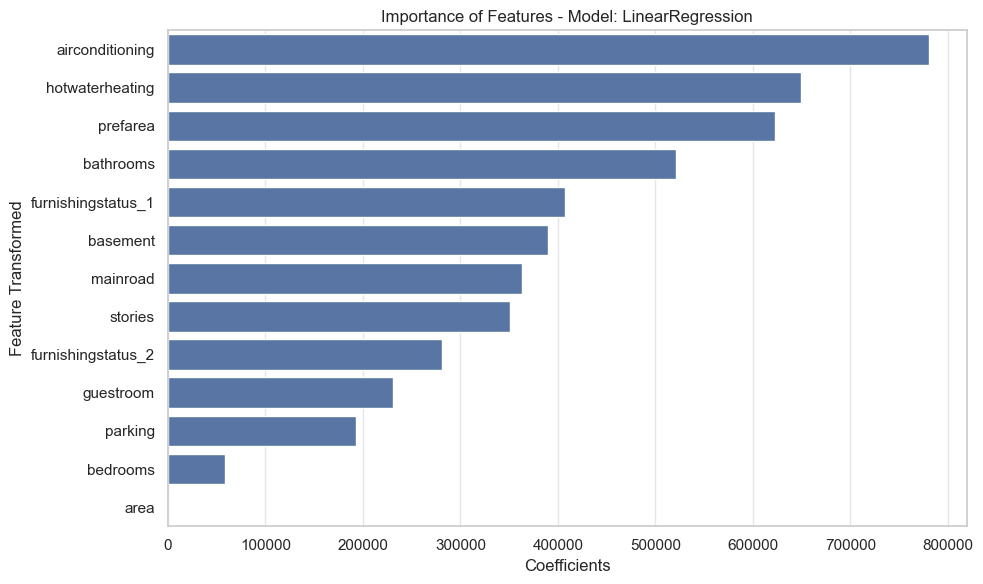

In [30]:
# Sort the coefficients by absolute value
feature_coeffs_sorted = feature_coeffs.sort_values("coef", key=abs, ascending=False)


plt.figure(figsize=(10,6))

# We use “feature_transformed” as the name of the Y column.
sns.barplot(x="coef", y="feature_transformed", data=feature_coeffs_sorted)

plt.title(f"Importance of Features - Model: {best_model_name}")
plt.xlabel("Coefficients")
plt.ylabel("Feature Transformed") 
plt.grid(axis='x', alpha=0.5) # Adds a grid for better readability
plt.tight_layout()
plt.show()





---

Based on the provided Linear Regression feature importance chart, here is an analysis in Markdown format:

---

### Feature Importance Analysis: Linear Regression Model

This analysis details the influence of various house characteristics on the target variable (implied to be house price) based on the magnitude of the model's coefficients, as shown in the bar chart.

---

### Ranking of Importance (from most to least influential)

The features are ranked by the absolute magnitude of their standardized coefficients, representing their marginal impact on the predicted house price, holding other features constant.

| Rank | Feature Transformed | Coefficient (Estimated Value Added) | Interpretation |
| :---: | :--- | :---: | :--- |
| **1** | **airconditioning** | $\approx 780,000$ | **Most influential:** Having air conditioning adds the most value. |
| **2** | **hotwaterheating** | $\approx 660,000$ | Indicates a substantial increase in price for having hot water heating. |
| **3** | **prefarea** | $\approx 620,000$ | Being in a preferred area significantly boosts the price. |
| **4** | **bathrooms** | $\approx 520,000$ | Each additional bathroom is highly valued. |
| **5** | **furnishingstatus\_1** | $\approx 410,000$ | This level of furnishing status has a high positive impact. |
| **6** | **basement** | $\approx 400,000$ | Having a basement is a major value-add. |
| **7** | **mainroad** | $\approx 360,000$ | Proximity to a main road is a strong positive factor. |
| **8** | **stories** | $\approx 350,000$ | Each additional floor or story adds a considerable amount to the price. |
| **9** | **furnishingstatus\_2** | $\approx 290,000$ | This furnishing status level has a moderate positive impact. |
| **10** | **guestroom** | $\approx 240,000$ | Having a guestroom provides a moderate price increase. |
| **11** | **parking** | $\approx 200,000$ | Parking space adds moderate value. |
| **12** | **bedrooms** | $\approx 60,000$ | Each additional bedroom has a surprisingly small coefficient. |
| **13** | **area** | $\approx 20,000$ | **Least influential:** The continuous feature 'area' has the smallest coefficient. |

---

### Key Observations

#### 1. Surprises in the Rankings

* **Air Conditioning** (`airconditioning`) and **Hot Water Heating** (`hotwaterheating`) are the **TOP 2 most influential features**. This suggests that essential amenities and comfort factors are the biggest drivers of the price.
* The **continuous features** (`area`, `bedrooms`) are ranked at the very bottom.
    * **`area`** has the smallest coefficient, which is **highly unexpected** as property size is typically among the most dominant price factors.
    * **`bedrooms`** is also surprisingly low.
* **Location/Status** features like **`prefarea`** (preferred area) and **`furnishingstatus_1`** are highly valued, securing positions in the top 5.

#### 2. Potential Multicollinearity

Features like **`bathrooms`** and **`stories`** appear high on the list. Given the surprisingly low coefficients for `area` and `bedrooms`, it's possible that these features are correlated with (or act as proxies for) size, or that the model setup (including potential engineered features not explicitly shown) is distributing the impact of size across multiple correlated variables.

#### 3. Binary vs. Continuous Features Domination

* **Top 10** features are predominantly **binary (dummy) or count** variables (e.g., `airconditioning`, `hotwaterheating`, `prefarea`, `basement`, `mainroad`, `guestroom`, `stories`, `bathrooms`).
* The pure **continuous features** (`area` and `bedrooms`) have the lowest impact.
* **Practical Interpretation:** The model suggests that the **presence of specific amenities and qualitative factors** (e.g., HVAC, preferred location, basement) is more critical for determining the house price than the pure quantitative size metrics (area, number of bedrooms).

---

### Practical Interpretation & Caveats

#### Practical Interpretation

The model provides an additive prediction structure, suggesting a baseline price is adjusted by the coefficient of each feature present or added. For instance, the price prediction is heavily driven by:
$$\text{Price} \approx (\ldots) + 780\text{K} \times \text{airconditioning} + 660\text{K} \times \text{hotwaterheating} + 620\text{K} \times \text{prefarea} + \ldots$$

#### Caveats

1.  **Low Impact of `area`:** The near-zero coefficient for `area` is highly unusual and suggests either significant **multicollinearity** (its variance is explained by other features) or an issue with the feature scaling or transformation used on the data for this specific model.
2.  **Limited Causal Interpretation:** As with all regression models, these coefficients show a **correlation** and the estimated marginal change in price, not a guaranteed **causal** effect.

---

### Conclusion

The Linear Regression model emphasizes that **qualitative amenities and location status** (especially `airconditioning`, `hotwaterheating`, and `prefarea`) are the **dominant value drivers** in house price determination, while the coefficients for the traditionally influential **quantitative characteristics** (`area`, `bedrooms`) are surprisingly low.